# Análisis del Reporte de Notas por Asignaturas del semestre 2023-I  

Fuente: STM

## I. Carga de Datos y Manipulación de Datos

In [ ]:
# @title I.1 Import de Liberias necesarias y configuraciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

In [ ]:
# @title I.2 Cargado y Prueba del archivo
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ReporteNotasAsignaturasRO-EDA/Reporte de Notas y Asignaciones 2023-I.xlsx')
data.head(2)

,Contact.DisplayName,PersonIdentifier.Identifier,ElectronicAddress.Value,PhoneNumber.Number,EducationalGoal.Abbreviation,DegreeAudit.Name,StudentCourseEnrollment.CourseID,StudentCourseEnrollment.CourseDescription,Contact.DisplayName_1,CourseEnrollmentStatus.Name,AcademicSubjectArea.Name,AcademicPeriod.Name,MatriculationStatus.Name,AdmissionsAttempt.Transfer,StudentCourseAssessmentComponentScore.Score,StudentCourseAssessmentComponentScore.Score_1,StudentCourseAssessmentComponentScore.Score_2,StudentCourseAssessmentComponentScore.Score_3,StudentCourseAssessmentComponentScore.Score_4,StudentCourseAssessmentComponentScore.Score_5,StudentCourseAssessmentComponentScore.Score_6,StudentCourseAssessmentComponentScore.Score_7,StudentCourseEnrollment.Score,Field1,GradeMaster.Grade
0,"ABAD BELTRAN, BENJAMIN JESUS",13695061,eate.benjaminjesusabad.beltran.be@unifranz.edu.bo,74936824,SIS,Licenciatura en Ingeniería de Sistemas EA,EA-PGM-611-P-2-SIS,PROGRAMACIÓN GRÁFICA Y MULTIMEDIA I,"GRIFFITHS JAUREGUI, JAVIER MARIO",Registered,Semestre 6,2023-S1-PR-EA,Matriculated,False,15.0,10.0,15.0,10.0,15.0,10.0,15.0,10.0,100.0,8,NaN
1,"ABARCA PONCE, ROSSMERY LIBERTAD",72105246,lpze.rossmerylibertad.abarca.po@unifranz.edu.bo,902082135,MED,Licenciatura en Medicina LP,LP-ING-313-C-207-MED,INGLÉS III,"PINELL CAMPUZANO, EDUARDO RUBEN",Registered,Semestre 3,2023-S1-PR-LP,Accepted for Enrollment,False,15.0,10.0,15.0,10.0,15.0,10.0,15.0,10.0,100.0,8,NaN


In [ ]:
# @title I.3 Verificacion y cambio de nombre de columnas del DF
# Verificamos los nombres de las columnas en el DF
current_columns = list(data.columns)

# Definimos los nuevos nombres para las columnas
nuevos_nombres_columnas = [
    "Estudiante"
  , "Id_Estudiante"
  , "Email"
  , "Telefono"
  , "Codigo_Carrera"
  , "Carrera"
  , "Id_Materia"
  , "Materia"
  , "Nombre_Referencia"
  , "Estado_materia"
  , "Periodo_materia"
  , "Id_periodo"
  , "Estado_matriculacion"
  , "Transferido"
  , "Hito_2"
  , "Ev_Proc_Hito_2"
  , "Hito_3"
  , "Ev_Proc_Hito_3"
  , "Hito_4"
  , "Ev_Proc_Hito_4"
  , "Hito_5"
  , "Ev_Proc_Hito_5"
  , "Nota_Final"
  , "Hitos"
  , "Master_Grade"
]

# Verificar el numero de columnas
print("Cantidad de columnas:", len(nuevos_nombres_columnas))
# Convertimos en un diccionario, uniendo el nombre actual con el nuevo y luego visualizarlo
column_rename = dict(zip(current_columns, nuevos_nombres_columnas))

print('Cambio de nombre de columnas'.center(70, '-'), end='\n\n')
for i, name in enumerate(column_rename):
  print(f'{i}: {name} --> {column_rename[name]}')

# Cambio de nombre de las columnas
print('Comprobación del cambio'.center(50, '-'))
data = data.rename(columns=column_rename)

Cantidad de columnas: 25
---------------------Cambio de nombre de columnas---------------------

0: Contact.DisplayName --> Estudiante
1: PersonIdentifier.Identifier --> Id_Estudiante
2: ElectronicAddress.Value --> Email
3: PhoneNumber.Number --> Telefono
4: EducationalGoal.Abbreviation --> Codigo_Carrera
5: DegreeAudit.Name --> Carrera
6: StudentCourseEnrollment.CourseID --> Id_Materia
7: StudentCourseEnrollment.CourseDescription --> Materia
8: Contact.DisplayName_1 --> Nombre_Referencia
9: CourseEnrollmentStatus.Name --> Estado_materia
10: AcademicSubjectArea.Name --> Periodo_materia
11: AcademicPeriod.Name --> Id_periodo
12: MatriculationStatus.Name --> Estado_matriculacion
13: AdmissionsAttempt.Transfer --> Transferido
14: StudentCourseAssessmentComponentScore.Score --> Hito_2
15: StudentCourseAssessmentComponentScore.Score_1 --> Ev_Proc_Hito_2
16: StudentCourseAssessmentComponentScore.Score_2 --> Hito_3
17: StudentCourseAssessmentComponentScore.Score_3 --> Ev_Proc_Hito_3
18: Stude

In [ ]:
# @title I.4 Tratamiento a varias columnas
# Eliminacion de columnas innecesarias
cols_to_drop = [
    "Master_Grade"
  , "Nombre_Referencia"
  , "Telefono"
]
data = data.drop(columns=cols_to_drop)

# Añade columnas de Sede, Gestion, Continua y Procesual
data['Sede'] = data['Id_periodo'].str.split('-').str[-1]
data['Gestion'] = data['Id_periodo'].str.extract('(\d{4}-S\d{1})')
data['Ev_Continuo'] = data['Hito_2'] \
                      + data['Hito_3'] \
                      + data['Hito_4']
data['Ev_Procesual'] = data['Ev_Proc_Hito_2'] \
                        + data['Ev_Proc_Hito_3'] \
                        + data['Ev_Proc_Hito_4'] \
                        + data['Ev_Proc_Hito_5'] \
                        + data['Hito_5']
data.head(2)

,Estudiante,Id_Estudiante,Email,Codigo_Carrera,Carrera,Id_Materia,Materia,Estado_materia,Periodo_materia,Id_periodo,Estado_matriculacion,Transferido,Hito_2,Ev_Proc_Hito_2,Hito_3,Ev_Proc_Hito_3,Hito_4,Ev_Proc_Hito_4,Hito_5,Ev_Proc_Hito_5,Nota_Final,Hitos,Sede,Gestion,Ev_Continuo,Ev_Procesual
0,"ABAD BELTRAN, BENJAMIN JESUS",13695061,eate.benjaminjesusabad.beltran.be@unifranz.edu.bo,SIS,Licenciatura en Ingeniería de Sistemas EA,EA-PGM-611-P-2-SIS,PROGRAMACIÓN GRÁFICA Y MULTIMEDIA I,Registered,Semestre 6,2023-S1-PR-EA,Matriculated,False,15.0,10.0,15.0,10.0,15.0,10.0,15.0,10.0,100.0,8,EA,2023-S1,45.0,55.0
1,"ABARCA PONCE, ROSSMERY LIBERTAD",72105246,lpze.rossmerylibertad.abarca.po@unifranz.edu.bo,MED,Licenciatura en Medicina LP,LP-ING-313-C-207-MED,INGLÉS III,Registered,Semestre 3,2023-S1-PR-LP,Accepted for Enrollment,False,15.0,10.0,15.0,10.0,15.0,10.0,15.0,10.0,100.0,8,LP,2023-S1,45.0,55.0


## II. Análisis Exploratorio

In [ ]:
# @title II.1 Detalles del DF
# Descripcion de datos
print('Detalles del archivo'.center(60, '-'))
data.describe(include='all')

--------------------Detalles del archivo--------------------


,Estudiante,Id_Estudiante,Email,Codigo_Carrera,Carrera,Id_Materia,Materia,Estado_materia,Periodo_materia,Id_periodo,Estado_matriculacion,Transferido,Hito_2,Ev_Proc_Hito_2,Hito_3,Ev_Proc_Hito_3,Hito_4,Ev_Proc_Hito_4,Hito_5,Ev_Proc_Hito_5,Nota_Final,Hitos,Sede,Gestion,Ev_Continuo,Ev_Procesual
count,100430,100430,100430,100430,100430,100430,100430,100430,100430,100430,100424,100430,92714.000000,92712.000000,92441.000000,92441.000000,92223.000000,92224.000000,91448.000000,91475.000000,90613.000000,100430.000000,100430,100430,92223.000000,91447.000000
unique,14887,14888,14888,17,117,4648,689,3,11,8,8,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN
top,"GALARZA ASBUN, PABLO IGNACIO",7958616,cbbe.pabloignacio.galarza.as@unifranz.edu.bo,MED,Licenciatura en Medicina CB,LP-BIO-B-311-P-11-MED,INGLÉS I,Registered,Semestre 1,2023-S1-PR-LP,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LP,2023-S1,NaN,NaN
freq,20,20,20,28794,11633,82,4484,94613,31055,29694,46941,95667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31142,100430,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.700110,6.742806,9.531128,6.664608,9.525986,6.699493,9.619412,6.686111,65.280412,7.381898,NaN,NaN,28.808855,36.460934
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.330691,2.996045,4.541904,3.115735,4.704374,3.222260,5.028890,3.407594,25.739958,2.209548,NaN,NaN,11.912250,14.999570
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,56.000000,8.000000,NaN,NaN,23.000000,31.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,8.000000,11.000000,8.000000,11.000000,8.000000,11.000000,8.000000,71.000000,8.000000,NaN,NaN,31.000000,40.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,9.000000,13.000000,9.000000,13.000000,9.000000,14.000000,9.000000,84.000000,8.000000,NaN,NaN,38.000000,47.000000


In [ ]:
#@title II.1.1 Informacion de las columnas del dataset
# Info de Datos
print('Informacion de Dataset'.center(60, '-'))
data.info()

-------------------Informacion de Dataset-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100430 entries, 0 to 100429
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Estudiante            100430 non-null  object 
 1   Id_Estudiante         100430 non-null  object 
 2   Email                 100430 non-null  object 
 3   Codigo_Carrera        100430 non-null  object 
 4   Carrera               100430 non-null  object 
 5   Id_Materia            100430 non-null  object 
 6   Materia               100430 non-null  object 
 7   Estado_materia        100430 non-null  object 
 8   Periodo_materia       100430 non-null  object 
 9   Id_periodo            100430 non-null  object 
 10  Estado_matriculacion  100424 non-null  object 
 11  Transferido           100430 non-null  bool   
 12  Hito_2                92714 non-null   float64
 13  Ev_Proc_Hito_2        92712 non-null   floa

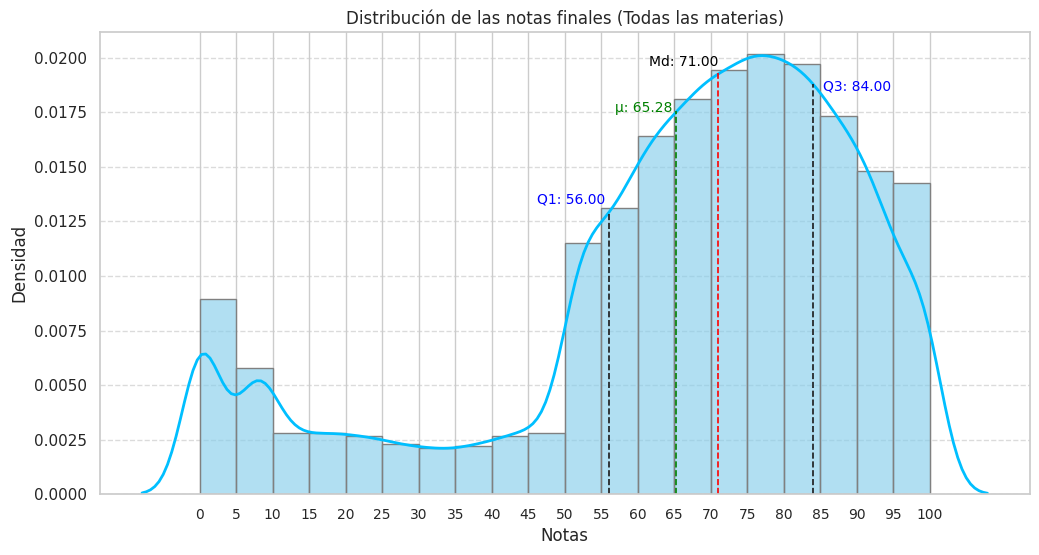

In [ ]:
# @title II.2 Creación del Histograma de Densidad y KDE (Estimación de Densidad de Kernel) de Notas
# Define bins
binwidth = 5
bins = np.arange(0, 101, binwidth)  # Bins de tamaño 5

# Obtenemos medidas de tendencia Central
q1 = data['Nota_Final'].quantile(0.25)
mediana = data['Nota_Final'].median()
promedio = data['Nota_Final'].mean()
q3 = data['Nota_Final'].quantile(0.75)

# Set el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el histograma
ax = sns.histplot(
    data['Nota_Final']
  , bins=bins
  , edgecolor='grey'
  , color='skyblue'
  , alpha=0.65
  , stat='density'
  )

# Nombres de ejes y otras configuraciones
plt.xlabel('Notas')
plt.ylabel('Densidad')
plt.title('Distribución de las notas finales (Todas las materias)')
plt.xticks(bins, fontsize=10)

plt.grid(
    axis='y'
  , linestyle='--'
  , alpha=0.7
  )

# Creacion del KDE plot
kde = sns.kdeplot(
    data['Nota_Final']
  , color='deepskyblue'
  , linestyle='-'
  , linewidth=2
  )

# Dibujar lineas para denotar las medidas anteriores
ax.vlines(q1, 0, kde.get_lines()[0].get_ydata()[np.argmax(kde.get_lines()[0].get_xdata() > q1)], linestyle='--', linewidth=1.2, color='k')
ax.vlines(promedio, 0, kde.get_lines()[0].get_ydata()[np.argmax(kde.get_lines()[0].get_xdata() > promedio)], linestyle='--', linewidth=1.2, color='green')
ax.vlines(mediana, 0, kde.get_lines()[0].get_ydata()[np.argmax(kde.get_lines()[0].get_xdata() > mediana)], linestyle='--', linewidth=1.2, color='red')
ax.vlines(q3, 0, kde.get_lines()[0].get_ydata()[np.argmax(kde.get_lines()[0].get_xdata() > q3)], linestyle='--', linewidth=1.2, color='k')

# Anotar los valores de las medidas
ax.annotate(f'Q1: {q1:.2f}', xy=(q1, 0), xytext=(q1-0.4, 0.0132), fontsize=10, color='blue', ha='right', va='bottom')
ax.annotate(f'\u03BC: {promedio:.2f}', xy=(promedio, 0), xytext=(promedio-0.5, 0.018), fontsize=10, color='green', ha='right', va='top')
ax.annotate(f'Md: {mediana:.2f}', xy=(mediana, 0), xytext=(mediana, 0.0195), fontsize=10, color='black', ha='right', va='bottom')
ax.annotate(f'Q3: {q3:.2f}', xy=(q3, 0), xytext=(q3+1.4, 0.019), fontsize=10, color='blue', ha='left', va='top')

plt.show()

Se puede observar una distribución que en general presenta asimetría a la izquierda, con las siguientes observaciones:

*   El **75%** de las materias obtuvieron notas >= **56 pts**
*   La nota promedio es **65.28 pts**, mientras la mediana es **71 pts**.
*   Existen dos grupos extra, concentrados en notas de **0-5** y luego de **5-10** puntos (que afectan al promedio).
*   La desviación estándar que se encontró es de **25.74 puntos** (Alta dispersión)

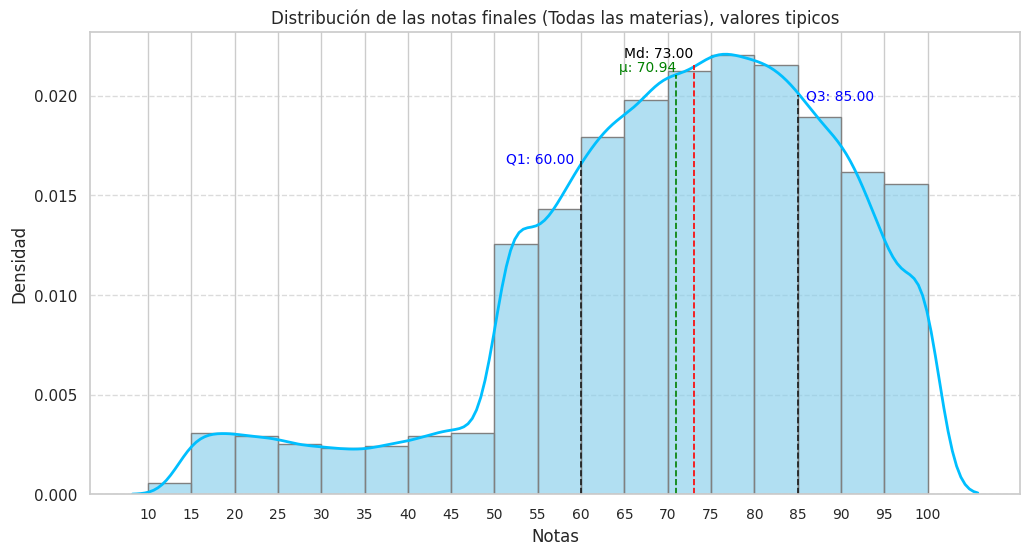

In [ ]:
# @title II.3 Creación del Histograma de Densidad y KDE (Estimación de Densidad de Kernel) de Notas, sin valores atipicos
# Calculamos el IQR y los limites para excluir a los outliers
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

# bin's size
bins = np.arange((lim_inf//10)*10, 101, binwidth)

# Excluyendo los outliers
tipicos = data[(data['Nota_Final'] >= lim_inf) & (data['Nota_Final'] <= lim_sup)]

# Obtenemos medidas de tendencia Central
q1_tip = tipicos['Nota_Final'].quantile(0.25)
mediana_tip = tipicos['Nota_Final'].median()
promedio_tip = tipicos['Nota_Final'].mean()
q3_tip = tipicos['Nota_Final'].quantile(0.75)

# Set el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el histograma
ax = sns.histplot(
    tipicos['Nota_Final']
  , bins=bins
  , edgecolor='grey'
  , color='skyblue'
  , alpha=0.65
  , stat='density'
  )

# Nombres de ejes y otras configuraciones
plt.xlabel('Notas')
plt.ylabel('Densidad')
plt.title('Distribución de las notas finales (Todas las materias), valores tipicos')
plt.xticks(bins, fontsize=10)

plt.grid(
    axis='y'
  , linestyle='--'
  , alpha=0.7
    )

# Creacion del KDE plot
kde_tip = sns.kdeplot(
    tipicos['Nota_Final']
  , color='deepskyblue'
  , linestyle='-'
  , linewidth=2
  )

# Dibujar lineas para denotar las medidas anteriores
ax.vlines(q1_tip, 0, kde_tip.get_lines()[0].get_ydata()[np.argmax(kde_tip.get_lines()[0].get_xdata() > q1_tip)], linestyle='--', linewidth=1.2, color='k')
ax.vlines(promedio_tip, 0, kde_tip.get_lines()[0].get_ydata()[np.argmax(kde_tip.get_lines()[0].get_xdata() > promedio_tip)], linestyle='--', linewidth=1.2, color='green')
ax.vlines(mediana_tip, 0, kde_tip.get_lines()[0].get_ydata()[np.argmax(kde_tip.get_lines()[0].get_xdata() > mediana_tip)], linestyle='--', linewidth=1.2, color='red')
ax.vlines(q3_tip, 0, kde_tip.get_lines()[0].get_ydata()[np.argmax(kde_tip.get_lines()[0].get_xdata() > q3_tip)], linestyle='--', linewidth=1.2, color='k')

# Anotar los valores de las medidas
ax.annotate(f'Q1: {q1_tip:.2f}', xy=(q1_tip, 0), xytext=(q1_tip-0.8, 0.0165), fontsize=10, color='blue', ha='right', va='bottom')
ax.annotate(f'\u03BC: {promedio_tip:.2f}', xy=(promedio_tip, 0), xytext=(promedio_tip, 0.0218), fontsize=10, color='green', ha='right', va='top')
ax.annotate(f'Md: {mediana_tip:.2f}', xy=(mediana_tip, 0), xytext=(mediana_tip, 0.0218), fontsize=10, color='black', ha='right', va='bottom')
ax.annotate(f'Q3: {q3_tip:.2f}', xy=(q3_tip, 0), xytext=(q3_tip+1, 0.02), fontsize=10, color='blue', ha='left', va='center')

plt.show()

Despues de excluir los valores atipicos aun se tiene una distribución asimétrica a la izquierda, y que representa mejor las notas de los estudiantes con las siguientes observaciones:

*   El **75%** de las notas es mayor a **60 pts**.
*   La nota promedio aumento a **70.94 pts**, mientras la mediana a **73 pts**
*   La desviación estándar se redujo a **18.59 pts**

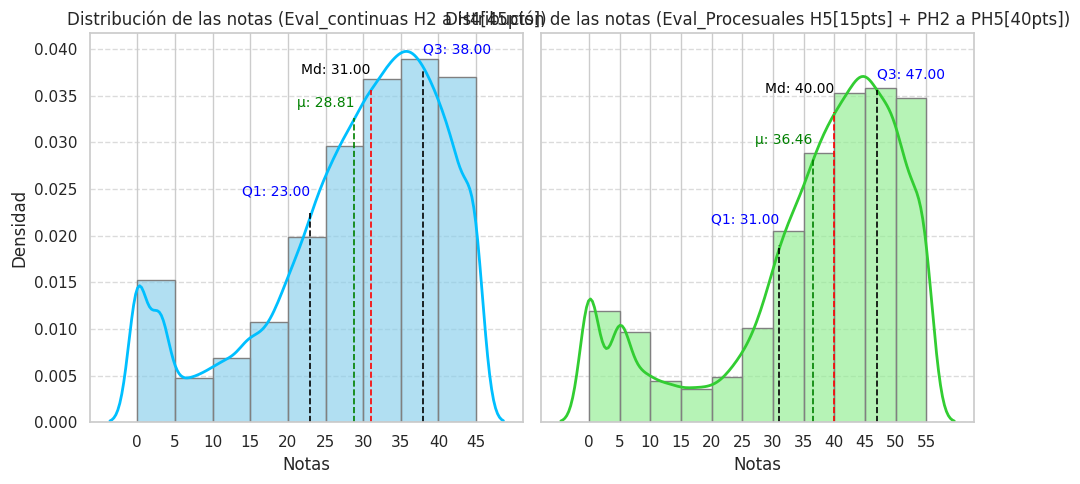

In [ ]:
# @title II.4 Distribucion de notas por tipo de evaluacion
# Define bins
bins_cont = np.arange(0, 46, binwidth)
bins_proc = np.arange(0, 56, binwidth)  # Bins of size 5

# Set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot for Eval_continuas
sns.histplot(
    data['Ev_Continuo'],
    bins=bins_cont,
    edgecolor='grey',
    color='skyblue',
    alpha=0.65,
    stat='density',
    ax=ax1
)

kde_cont = sns.kdeplot(
    data['Ev_Continuo'],
    color='deepskyblue',
    linestyle='-',
    linewidth=2,
    ax=ax1
)

ax1.set_xlabel('Notas')
ax1.set_ylabel('Densidad')
ax1.set_title('Distribución de las notas (Eval_continuas H2 a H4[45pts])')
ax1.set_xticks(bins_cont)

ax1.grid(
    axis='y',
    linestyle='--',
    alpha=0.7
)

# Plot for Eval_Procesuales
sns.histplot(
    data['Ev_Procesual'],
    bins=bins_proc,
    edgecolor='grey',
    color='lightgreen',
    alpha=0.65,
    stat='density',
    ax=ax2
)

kde_proc = sns.kdeplot(
    data['Ev_Procesual'],
    color='limegreen',
    linestyle='-',
    linewidth=2,
    ax=ax2
)

ax2.set_xlabel('Notas')
ax2.set_ylabel('Densidad')
ax2.set_title('Distribución de las notas (Eval_Procesuales H5[15pts] + PH2 a PH5[40pts])')
ax2.set_xticks(bins_proc)

ax2.grid(
    axis='y',
    linestyle='--',
    alpha=0.7
)


# Obtenemos medidas de tendencia Central
q1_proc = data['Ev_Procesual'].quantile(0.25)
mediana_proc = data['Ev_Procesual'].median()
promedio_proc = data['Ev_Procesual'].mean()
q3_proc = data['Ev_Procesual'].quantile(0.75)

q1_cont = data['Ev_Continuo'].quantile(0.25)
mediana_cont = data['Ev_Continuo'].median()
promedio_cont = data['Ev_Continuo'].mean()
q3_cont = data['Ev_Continuo'].quantile(0.75)

# Dibujar lineas para denotar las medidas anteriores
ax1.vlines(q1_cont, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > q1_cont)], linestyle='--', linewidth=1.2, color='black')
ax1.vlines(promedio_cont, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > promedio_cont)], linestyle='--', linewidth=1.2, color='green')
ax1.vlines(mediana_cont, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > mediana_cont)], linestyle='--', linewidth=1.2, color='red')
ax1.vlines(q3_cont, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > q3_cont)], linestyle='--', linewidth=1.2, color='black')

ax2.vlines(q1_proc, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > q1_proc)], linestyle='--', linewidth=1.2, color='black')
ax2.vlines(mediana_proc, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > mediana_proc)], linestyle='--', linewidth=1.2, color='red')
ax2.vlines(promedio_proc, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > promedio_proc)], linestyle='--', linewidth=1.2, color='green')
ax2.vlines(q3_proc, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > q3_proc)], linestyle='--', linewidth=1.2, color='black')

# Anotar los valores de las medidas
ax1.annotate(f'Q1: {q1_cont:.2f}', xy=(q1_cont, 0), xytext=(q1_cont, 0.024), fontsize=10, color='blue', ha='right', va='bottom')
ax1.annotate(f'\u03BC: {promedio_cont:.2f}', xy=(promedio_cont, 0), xytext=(promedio_cont, 0.035), fontsize=10, color='green', ha='right', va='top')
ax1.annotate(f'Md: {mediana_cont:.2f}', xy=(mediana_cont, 0), xytext=(mediana_cont, 0.037), fontsize=10, color='black', ha='right', va='bottom')
ax1.annotate(f'Q3: {q3_cont:.2f}', xy=(q3_cont, 0), xytext=(q3_cont, 0.04), fontsize=10, color='blue', ha='left', va='center')

ax2.annotate(f'Q1: {q1_proc:.2f}', xy=(q1_proc, 0), xytext=(q1_proc, 0.021), fontsize=10, color='blue', ha='right', va='bottom')
ax2.annotate(f'\u03BC: {promedio_proc:.2f}', xy=(promedio_proc, 0), xytext=(promedio_proc, 0.031), fontsize=10, color='green', ha='right', va='top')
ax2.annotate(f'Md: {mediana_proc:.2f}', xy=(mediana_proc, 0), xytext=(mediana_proc, 0.035), fontsize=10, color='black', ha='right', va='bottom')
ax2.annotate(f'Q3: {q3_proc:.2f}', xy=(q3_proc, 0), xytext=(q3_proc, 0.038), fontsize=10, color='blue', ha='left', va='top')


plt.tight_layout()
plt.show()

Analizando las distribuciones para ambos tipos de evaluaciones, Continua y Procesual, se tiene que ambas mantienen la misma asimetría que la distribución de notas finales, con las siguientes observaciones:
* El **75%** de las notas, para las evaluaciones **Continuas** fueron >= **23 pts sobre 45 pts**. Mientras que para las evaluaciones **procesuales** fueron >= **31 pts sobre 55 pts**.
* Existe una mayor dispersión en las notas de las evaluaciones **continuas** (std = 11.91 pts) que en las de evaluaciones **procesuales** (std = 15 pts), lo que significa que hay mas cantidad de valores atipicos en las evaluaciones procesuales.

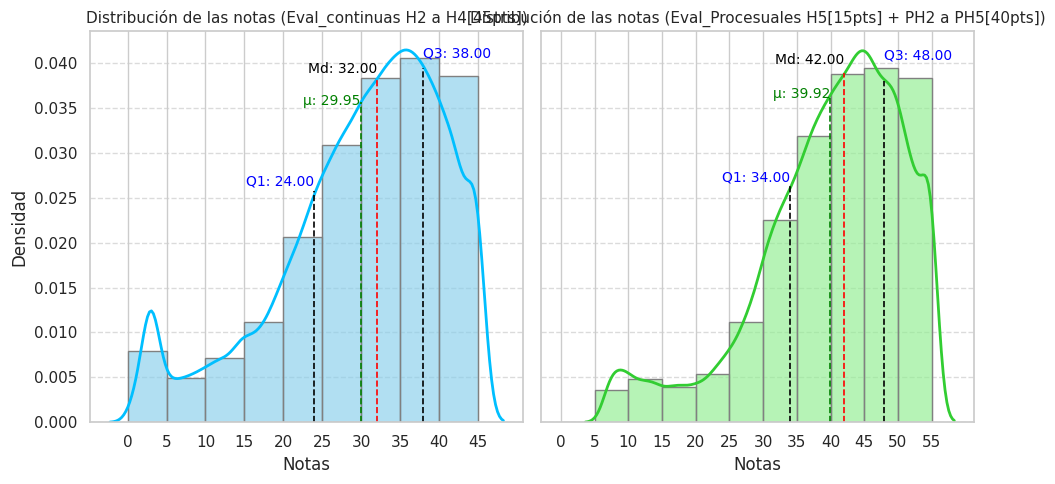

In [ ]:
# @title II.5 Distribucion de notas por tipo de evaluacion, Valores Típicos
# Hallar IQR y valores limites
fontsize_title = 11

iqr_cont = q3_cont - q1_cont
iqr_proc = q3_proc - q1_proc

lim_inf_cont = q1_cont - iqr_cont * 1.5
lim_sup_cont = q3_cont + iqr_cont * 1.5

lim_inf_proc = q1_proc - iqr_proc * 1.5
lim_sup_proc = q3_proc + iqr_proc * 1.5

# Define bins
bins_cont = np.arange((lim_inf_cont//10)*10, 46, binwidth)
bins_proc = np.arange((lim_inf_proc//10)*10, 56, binwidth)  # Bins of size 5

# Hallar un DF excluyendo los outliers
tipicos_cont = data[(data['Ev_Continuo'] >= lim_inf_cont) & (data['Ev_Continuo'] <= lim_sup_cont)]
tipicos_proc = data[(data['Ev_Procesual'] >= lim_inf_proc) & (data['Ev_Procesual'] <= lim_sup_proc)]

# Set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Plot for Eval_continuas
sns.histplot(
    tipicos_cont['Ev_Continuo'],
    bins=bins_cont,
    edgecolor='grey',
    color='skyblue',
    alpha=0.65,
    stat='density',
    ax=ax1
)

kde_cont = sns.kdeplot(
    tipicos_cont['Ev_Continuo'],
    color='deepskyblue',
    linestyle='-',
    linewidth=2,
    ax=ax1
)

ax1.set_xlabel('Notas')
ax1.set_ylabel('Densidad')
ax1.set_title('Distribución de las notas (Eval_continuas H2 a H4[45pts])', fontsize=fontsize_title)
ax1.set_xticks(bins_cont)

ax1.grid(
    axis='y',
    linestyle='--',
    alpha=0.7
)

# Plot for Eval_Procesuales
sns.histplot(
    tipicos_proc['Ev_Procesual'],
    bins=bins_proc,
    edgecolor='grey',
    color='lightgreen',
    alpha=0.65,
    stat='density',
    ax=ax2
)

kde_proc = sns.kdeplot(
    tipicos_proc['Ev_Procesual'],
    color='limegreen',
    linestyle='-',
    linewidth=2,
    ax=ax2
)

ax2.set_xlabel('Notas')
ax2.set_ylabel('Densidad')
ax2.set_title('Distribución de las notas (Eval_Procesuales H5[15pts] + PH2 a PH5[40pts])', fontsize=fontsize_title)
ax2.set_xticks(bins_proc)

ax2.grid(
    axis='y',
    linestyle='--',
    alpha=0.7
)

q1_cont_tip = tipicos_cont['Ev_Continuo'].quantile(0.25)
promedio_cont_tip = tipicos_cont['Ev_Continuo'].mean()
mediana_cont_tip = tipicos_cont['Ev_Continuo'].median()
q3_cont_tip = tipicos_cont['Ev_Continuo'].quantile(0.75)

q1_proc_tip = tipicos_proc['Ev_Procesual'].quantile(0.25)
promedio_proc_tip = tipicos_proc['Ev_Procesual'].mean()
mediana_proc_tip = tipicos_proc['Ev_Procesual'].median()
q3_proc_tip = tipicos_proc['Ev_Procesual'].quantile(0.75)

# Dibujar lineas para denotar las medidas anteriores
ax1.vlines(q1_cont_tip, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > q1_cont_tip)], linestyle='--', linewidth=1.2, color='black')
ax1.vlines(promedio_cont_tip, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > promedio_cont_tip)], linestyle='--', linewidth=1.2, color='green')
ax1.vlines(mediana_cont_tip, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > mediana_cont_tip)], linestyle='--', linewidth=1.2, color='red')
ax1.vlines(q3_cont_tip, 0, kde_cont.get_lines()[0].get_ydata()[np.argmax(kde_cont.get_lines()[0].get_xdata() > q3_cont_tip)], linestyle='--', linewidth=1.2, color='black')

ax2.vlines(q1_proc_tip, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > q1_proc_tip)], linestyle='--', linewidth=1.2, color='black')
ax2.vlines(mediana_proc_tip, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > mediana_proc_tip)], linestyle='--', linewidth=1.2, color='red')
ax2.vlines(promedio_proc_tip, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > promedio_proc_tip)], linestyle='--', linewidth=1.2, color='green')
ax2.vlines(q3_proc_tip, 0, kde_proc.get_lines()[0].get_ydata()[np.argmax(kde_proc.get_lines()[0].get_xdata() > q3_proc_tip)], linestyle='--', linewidth=1.2, color='black')

# Anotar los valores de las medidas
ax1.annotate(f'Q1: {q1_cont_tip:.2f}', xy=(q1_cont_tip, 0), xytext=(q1_cont_tip, 0.026), fontsize=10, color='blue', ha='right', va='bottom')
ax1.annotate(f'\u03BC: {promedio_cont_tip:.2f}', xy=(promedio_cont_tip, 0), xytext=(promedio_cont_tip, 0.0365), fontsize=10, color='green', ha='right', va='top')
ax1.annotate(f'Md: {mediana_cont_tip:.2f}', xy=(mediana_cont_tip, 0), xytext=(mediana_cont_tip, 0.0385), fontsize=10, color='black', ha='right', va='bottom')
ax1.annotate(f'Q3: {q3_cont_tip:.2f}', xy=(q3_cont_tip, 0), xytext=(q3_cont_tip, 0.041), fontsize=10, color='blue', ha='left', va='center')

ax2.annotate(f'Q1: {q1_proc_tip:.2f}', xy=(q1_proc_tip, 0), xytext=(q1_proc_tip, 0.0265), fontsize=10, color='blue', ha='right', va='bottom')
ax2.annotate(f'\u03BC: {promedio_proc_tip:.2f}', xy=(promedio_proc_tip, 0), xytext=(promedio_proc_tip, 0.0365), fontsize=10, color='green', ha='right', va='center')
ax2.annotate(f'Md: {mediana_proc_tip:.2f}', xy=(mediana_proc_tip, 0), xytext=(mediana_proc_tip, 0.0395), fontsize=10, color='black', ha='right', va='bottom')
ax2.annotate(f'Q3: {q3_proc_tip:.2f}', xy=(q3_proc_tip, 0), xytext=(q3_proc_tip, 0.04), fontsize=10, color='blue', ha='left', va='bottom')


plt.tight_layout()
plt.show()

Después de quitar los valores atipicos se tiene un aumento en las medidas de tendencia central en ambos tipos de evaluaciones (**disminución de la dispersión**).

***Observación***: Aún después de quitar los valores atípicos en las evaluaciones **continuas** se tienen varias materias que concentran notas muy bajas (de 0 a 5 pts).  

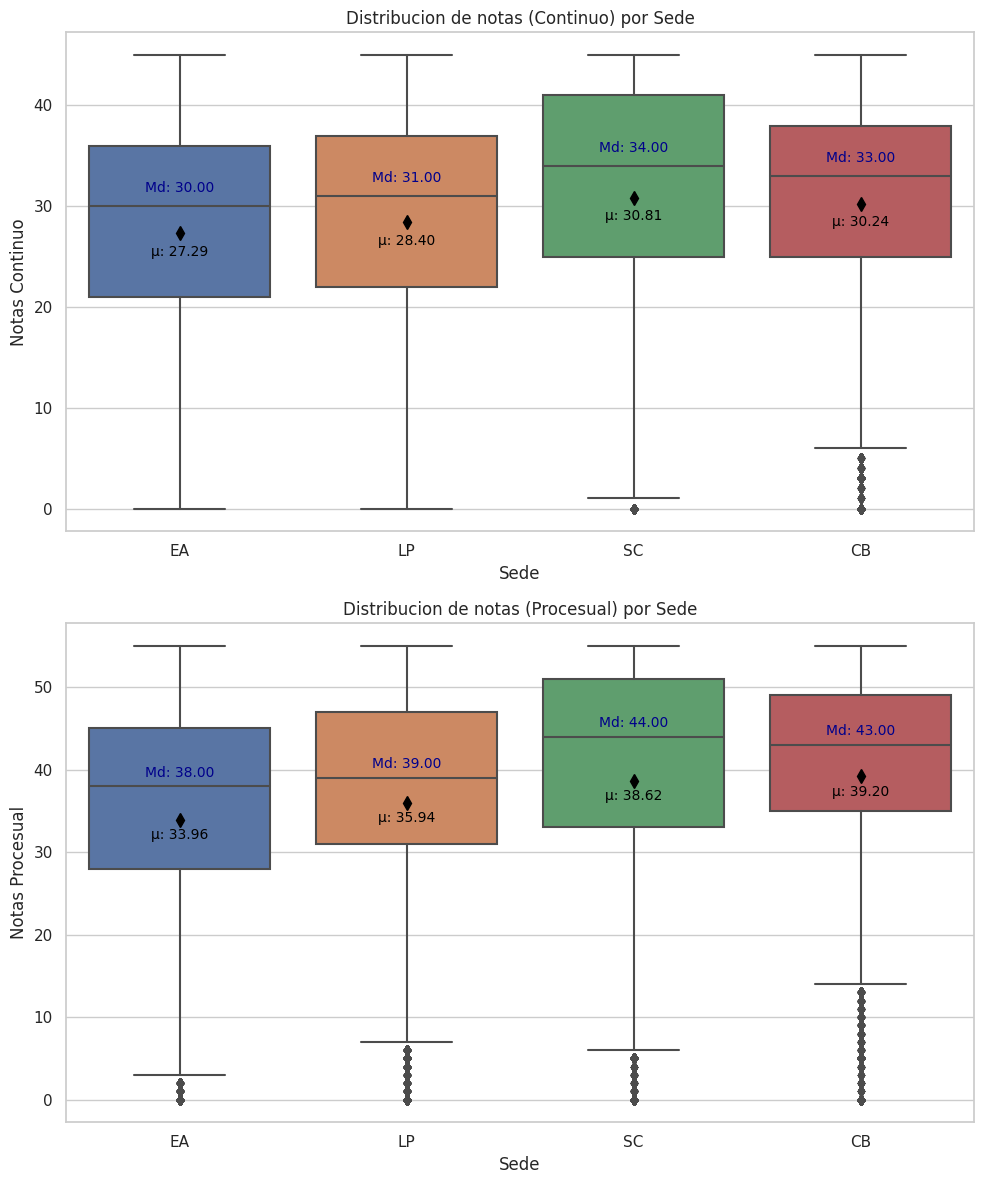

In [ ]:
# @title II.6 Boxplot por tipo de evaluacion (Continua y Procesual) y Sede
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Box plot for Ev_continuas
sns.boxplot(
    x='Sede',
    y='Ev_Continuo',
    data=data,
    ax=axes[0]
)

axes[0].set_xlabel('Sede')
axes[0].set_ylabel('Notas Continuo')
axes[0].set_title('Distribucion de notas (Continuo) por Sede')

promedios_cont = data.groupby('Sede')['Ev_Continuo'].mean()
medianas_cont = data.groupby('Sede')['Ev_Continuo'].median()

for i, sede in enumerate(data['Sede'].unique()):
    axes[0].text(
        i, promedios_cont[sede] - 2.5
      , f'\u03BC: {promedios_cont[sede]:.2f}'
      , ha='center', va='bottom', fontsize=10, color='black')
    axes[0].text(
        i, medianas_cont[sede] + 2.5
      , f'Md: {medianas_cont[sede]:.2f}'
      , ha='center', va='top', fontsize=10, color='darkblue')
    axes[0].plot(
        i, promedios_cont[sede]
        , marker='d', markersize=7, color='black')


# Box plot for Ev_Procesuales
sns.boxplot(
    x='Sede',
    y='Ev_Procesual',
    data=data,
    ax=axes[1]
)

promedios_proc = data.groupby('Sede')['Ev_Procesual'].mean()
medianas_proc = data.groupby('Sede')['Ev_Procesual'].median()

for i, sede in enumerate(data['Sede'].unique()):
    axes[1].text(
        i, promedios_proc[sede] - 2.7
      , f'\u03BC: {promedios_proc[sede]:.2f}'
      , ha='center', va='bottom', fontsize=10, color='black')
    axes[1].text(
        i, medianas_proc[sede] + 2.5
      , f'Md: {medianas_proc[sede]:.2f}'
      , ha='center', va='top', fontsize=10, color='darkblue')
    axes[1].plot(
        i, promedios_proc[sede]
        , marker='d', markersize=7, color='black')

axes[1].set_xlabel('Sede')
axes[1].set_ylabel('Notas Procesual')
axes[1].set_title('Distribucion de notas (Procesual) por Sede')

plt.tight_layout()
plt.show()

* En las **evaluaciones Continuas** se puede observar que tanto **El Alto** como **La Paz** no presentan **valores atipicos** por lo que estarían siendo representados correctamente, mientras que Cochabamba y Santa Cruz tienen notas más concentradas, con menos dispersión por lo que tienen valores atípicos (Especialmente Cochabamba).
* En las **evaluaciones Procesuales** se tienen **valores atípicos** afectando a todas las sedes, es decir que existe una menor dispersión de notas, por lo que el promedio en cada sede es mayor al que se muestra en la gráfica.

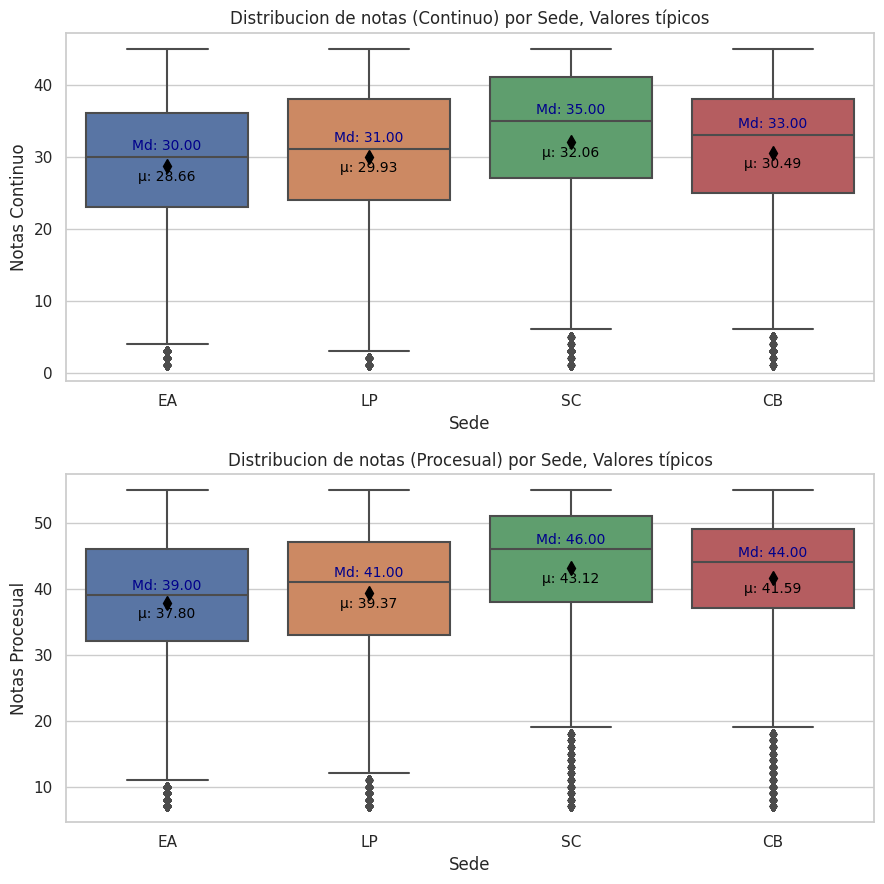

In [ ]:
# @title II.6 Boxplot por tipo de evaluacion (Continua y Procesual) y Sede, Valores Típicos
fig, axes = plt.subplots(2, 1, figsize=(9, 9))

# Boxen plot for Ev_continuas
sns.boxplot(
    x='Sede',
    y='Ev_Continuo',
    data=tipicos_cont,
    ax=axes[0]
)

axes[0].set_xlabel('Sede')
axes[0].set_ylabel('Notas Continuo')
axes[0].set_title('Distribucion de notas (Continuo) por Sede, Valores típicos')

promedios_cont = tipicos_cont.groupby('Sede')['Ev_Continuo'].mean()
medianas_cont = tipicos_cont.groupby('Sede')['Ev_Continuo'].median()

for i, sede in enumerate(data['Sede'].unique()):
    axes[0].text(
        i, promedios_cont[sede] - 2.5
      , f'\u03BC: {promedios_cont[sede]:.2f}'
      , ha='center', va='bottom', fontsize=10, color='black')
    axes[0].text(
        i, medianas_cont[sede] + 2.5
      , f'Md: {medianas_cont[sede]:.2f}'
      , ha='center', va='top', fontsize=10, color='darkblue')
    axes[0].plot(
        i, promedios_cont[sede]
        , marker='d', markersize=7, color='black')


# Boxen plot for Ev_Procesuales
sns.boxplot(
    x='Sede',
    y='Ev_Procesual',
    data=tipicos_proc,
    ax=axes[1]
)

promedios_proc = tipicos_proc.groupby('Sede')['Ev_Procesual'].mean()
medianas_proc = tipicos_proc.groupby('Sede')['Ev_Procesual'].median()

for i, sede in enumerate(data['Sede'].unique()):
    axes[1].text(
        i, promedios_proc[sede] - 2.7
      , f'\u03BC: {promedios_proc[sede]:.2f}'
      , ha='center', va='bottom', fontsize=10, color='black')
    axes[1].text(
        i, medianas_proc[sede] + 2.5
      , f'Md: {medianas_proc[sede]:.2f}'
      , ha='center', va='top', fontsize=10, color='darkblue')
    axes[1].plot(
        i, promedios_proc[sede]
        , marker='d', markersize=7, color='black')

axes[1].set_xlabel('Sede')
axes[1].set_ylabel('Notas Procesual')
axes[1].set_title('Distribucion de notas (Procesual) por Sede, Valores típicos')

plt.tight_layout()
plt.show()

Despues de excluir los valores atípicos iniciales se tienen las siguientes observaciones:
* Hay una **mejor representación** de las notas en cada sede.
* Las **sedes** con **mejores notas** en ambos tipos de evaluaciones son **Cochabamba y Santa Cruz**.
* En todas las sedes se puede observar que hay **mejores notas en Evaluaciones Procesuales** que en Evaluaciones Continuas (haciendo la **equivalencia a 100 pts**)

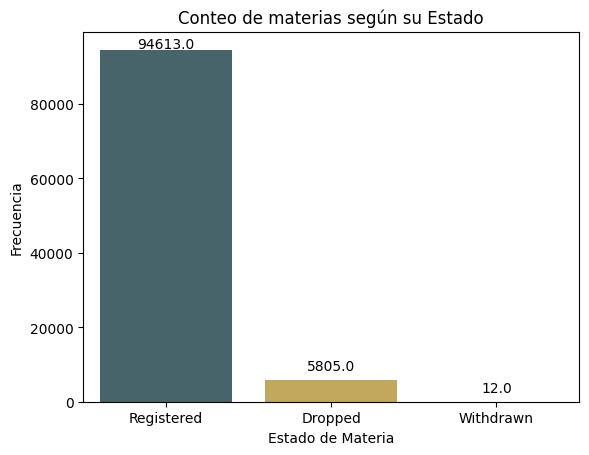

In [ ]:
# @title II.7 Barchart de Estado de Materias
custom_colors = ["#426871", "#D2B04C", "#C25A3D", "#FFA500", "#C39B6A"]

ax = sns.countplot(x="Estado_materia", data=data, palette=custom_colors)

# Incluir los datos en el grafico
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()*0.976),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Estado de Materia')
plt.ylabel('Frecuencia')
plt.title('Conteo de materias según su Estado')
plt.show()

* La mayoría de las materias se completan de forma normal
* El porcentaje de abandono y retiro de materias con respecto al total es del 5.78% (Dropped + Withdrawn)

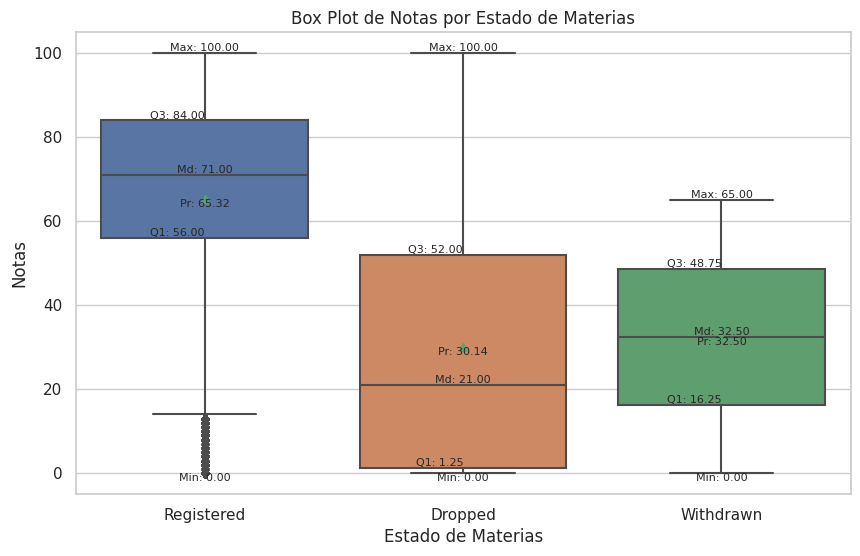

In [ ]:
# @title II.8 Boxplot Notas por Estado de Materia
# Crear un boxplot mostrando la mediana, el promedio, cuartiles, min y max
sns.set(style="whitegrid")  # Set style
plt.figure(figsize=(10, 6))  # Set figure size
ax = sns.boxplot(x='Estado_materia', y='Nota_Final', data=data, showfliers=True, showmeans=True)
fsize = 8

# Anotar cuartiles, promedio y mediana
for category in data['Estado_materia'].unique():
    subset = data[data['Estado_materia'] == category]
    q1 = subset['Nota_Final'].quantile(0.25)
    median = subset['Nota_Final'].median()
    q3 = subset['Nota_Final'].quantile(0.75)
    mean = subset['Nota_Final'].mean()
    max = subset['Nota_Final'].max()
    min = subset['Nota_Final'].min()

    ax.text(data['Estado_materia'].unique().tolist().index(category), min, f'Min: {min:.2f}', ha='center', va='top', fontsize=fsize)
    ax.text(data['Estado_materia'].unique().tolist().index(category), q1, f'Q1: {q1:.2f}', ha='right', va='bottom', fontsize=fsize)
    ax.text(data['Estado_materia'].unique().tolist().index(category), median, f'Md: {median:.2f}', ha='center', va='bottom', fontsize=fsize)
    ax.text(data['Estado_materia'].unique().tolist().index(category), q3, f'Q3: {q3:.2f}', ha='right', va='bottom', fontsize=fsize)
    ax.text(data['Estado_materia'].unique().tolist().index(category), mean, f'Pr: {mean:.2f}', ha='center', va='top', fontsize=fsize)
    ax.text(data['Estado_materia'].unique().tolist().index(category), max, f'Max: {max:.2f}', ha='center', va='bottom', fontsize=fsize)


plt.xlabel('Estado de Materias')
plt.ylabel('Notas')
plt.title('Box Plot de Notas por Estado de Materias')
plt.show()

*   Las notas de materias con estado "**Registered**" también tienen **asimetria a la izquierda** y muestra valores atipicos (**menores a 14 pts**).
*   Las materias con estado "**Dropped**", tienen una **gran dispersión** en las notas y tiene **asimetría a la derecha**, lo que indica que hay pocos o ningun valor atipico y que en general **concentra notas bajas** (**75% menor a 52 pts**).
* Las notas de las materias registradas como "**Withdrawn**", tiene una **distribución simétrica**, que parece ser normal, y **no presenta valores atipicos**.

In [ ]:
# @title II.9.1 Tratamiento para Estado de matriculacion
# Limpiar datos del Estado de matriculación
data.loc[data["Estado_matriculacion"] == "Matriculado", "Estado_matriculacion"] = "Matriculated"

# Aplicación de la funcion de agregación, para generar un DF para agrupar a los estudiantes por su estado de matriculacion
EtMtr_vs_Est = data.groupby(["Estado_matriculacion"])[["Id_Estudiante"]].nunique()
EtMtr_vs_Est = EtMtr_vs_Est.reset_index()
EtMtr_vs_Est.sort_values(by="Id_Estudiante", ascending=True, inplace=True)

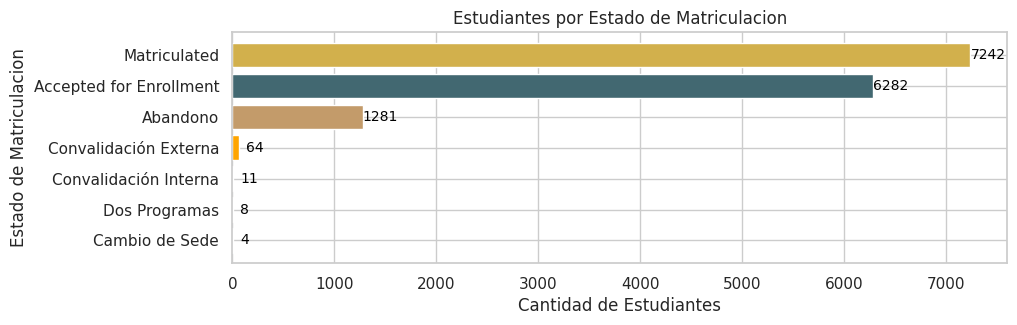

In [ ]:
#@title II.9.2 Barchart Horizontal de Estudiantes por Estado de Matriculacion
# set size para el grafico
plt.figure(figsize=(10, 3))

# Crear un barchart horizontal, estudiantes por estado de matriculacion
bars = plt.barh(EtMtr_vs_Est.Estado_matriculacion, EtMtr_vs_Est.Id_Estudiante, color=custom_colors)

# colocar datalabels a cada barra
for bar in bars:
    if bar.get_width() < 1000:
      extra = 70
    else:
      extra = 0
    plt.text(bar.get_width()+extra, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.0f}',  # Formatear el label
             va='center', ha='left', color='black', fontsize=10)

plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Estado de Matriculacion')
plt.title('Estudiantes por Estado de Matriculacion')
plt.show()

*   Los estudiantes matriculados y aceptados para registrarse representan un 90.81% del total
*   Los estudiantes que se registraron con abandono de semestre representan el 8.60% del total

In [ ]:
#@title II.9.3 Creacion de dataframe de estudiantes con notas validas en el sistema
dd = data[data['Nota_Final'].isna() == False]
est_vs_em = dd.groupby(['Estado_matriculacion'])[['Id_Estudiante']].nunique()
est_vs_em.reset_index()
est_vs_em.sort_values(by="Id_Estudiante", ascending=True, inplace=True)
est_vs_em

,Id_Estudiante
Estado_matriculacion,
Cambio de Sede,3
Dos Programas,8
Convalidación Interna,11
Convalidación Externa,64
Abandono,1247
Accepted for Enrollment,6237
Matriculated,6453


In [ ]:
# @title II.10.1 Creacion de DF de notas por estado de matriculacion
estMat_df = data[['Estado_matriculacion', 'Nota_Final']].copy()
nulls = estMat_df['Estado_matriculacion'].isna().sum()
total = estMat_df['Estado_matriculacion'].value_counts().sum() + nulls
print(f'Null values {nulls}', estMat_df['Estado_matriculacion'].value_counts(), f'Registros en total: {total}', sep='\n', end='\n\nReemplazando nulls con la moda...\n\n')

# reemplazo de los valores vacios (nulls o NaN) por la moda
moda = estMat_df.loc[:, 'Estado_matriculacion'].mode()[0]
estMat_df['Estado_matriculacion'].fillna(moda, inplace=True)
estMat_df[estMat_df['Estado_matriculacion'].isna()]
nulls = estMat_df['Estado_matriculacion'].isna().sum()
total = estMat_df['Estado_matriculacion'].value_counts().sum() + nulls
print(f'Null values {nulls}', estMat_df['Estado_matriculacion'].value_counts(), f'registros en total: {total}', sep='\n')

Null values 6
Matriculated               46980
Accepted for Enrollment    43767
Abandono                    8777
Convalidación Externa        738
Convalidación Interna         83
Dos Programas                 53
Cambio de Sede                26
Name: Estado_matriculacion, dtype: int64
Registros en total: 100430

Reemplazando nulls con la moda...

Null values 0
Matriculated               46986
Accepted for Enrollment    43767
Abandono                    8777
Convalidación Externa        738
Convalidación Interna         83
Dos Programas                 53
Cambio de Sede                26
Name: Estado_matriculacion, dtype: int64
registros en total: 100430


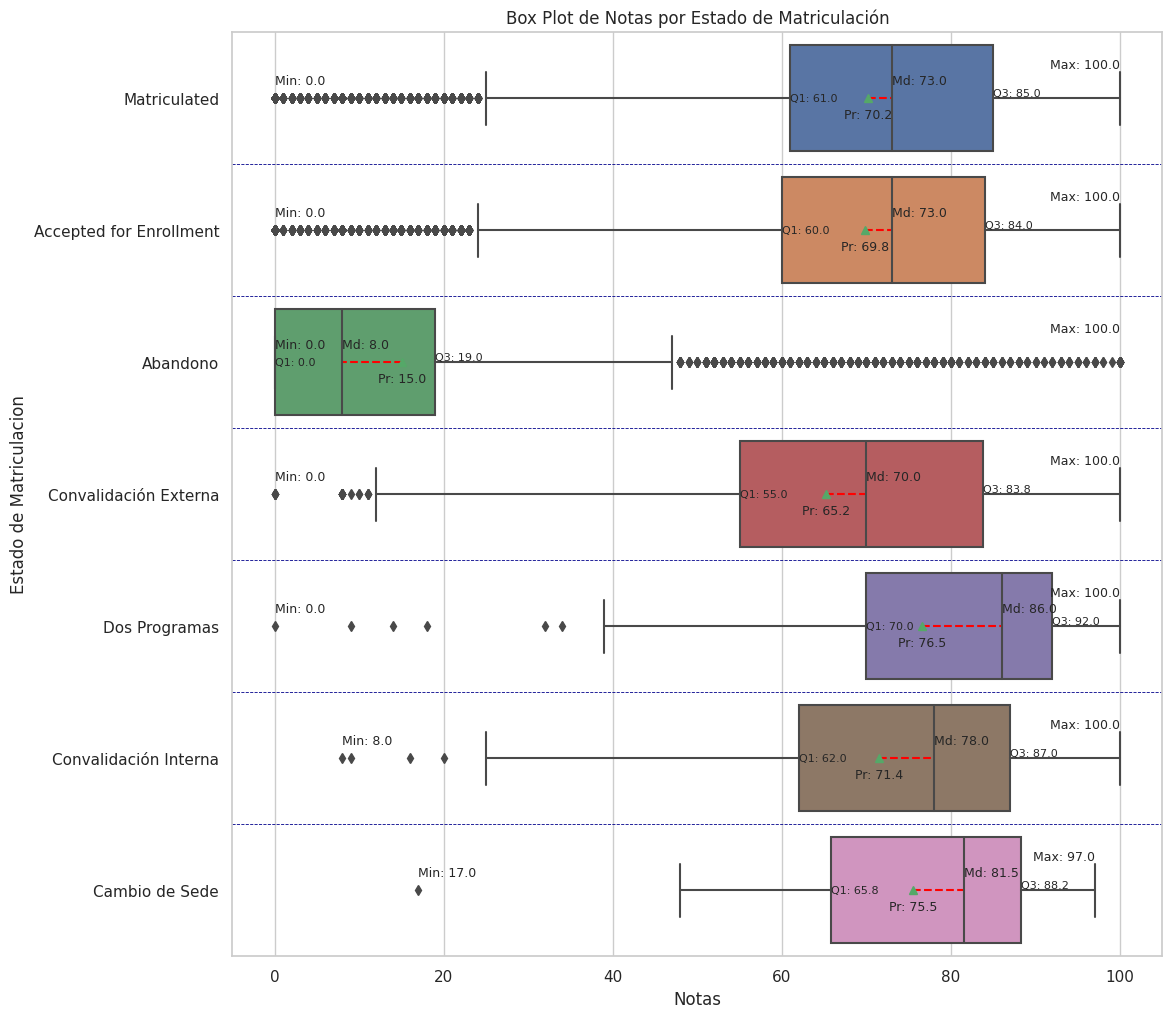

In [54]:
# @title II.10.2 Boxplot Notas por Estado de Matriculacion (Materias)
sns.set(style="whitegrid")  # Set style
plt.figure(figsize=(12, 12))  # Set figure size

ax = sns.boxplot(y='Estado_matriculacion', x='Nota_Final', data=estMat_df, showfliers=True, showmeans=True)
textSize = 9
# Anotar detalles
for i, category in enumerate(estMat_df['Estado_matriculacion'].unique()):
    subset = estMat_df[estMat_df['Estado_matriculacion'] == category].dropna()
    q1 = subset['Nota_Final'].quantile(0.25)
    median = subset['Nota_Final'].median()
    q3 = subset['Nota_Final'].quantile(0.75)
    mean = subset['Nota_Final'].mean()
    max = subset['Nota_Final'].max()
    min = subset['Nota_Final'].min()

    ax.text(min, i-0.08, f'Min: {min:.1f}', ha='left', va='bottom', fontsize = textSize)
    ax.text(q1, i, f'Q1: {q1:.1f}', ha='left', va='center', fontsize = textSize-1)
    ax.text(median, i-0.08, f'Md: {median:.1f}', ha='left', va='bottom', fontsize = textSize)
    ax.text(mean, i+0.08, f'Pr: {mean:.1f}', ha='center', va='top', fontsize = textSize)
    ax.hlines(i, mean, median, color='red', linestyle='--')
    ax.text(q3, i, f'Q3: {q3:.1f}', ha='left', va='bottom', fontsize = textSize-1)
    ax.text(max, i-0.2, f'Max: {max:.1f}', ha='right', va='bottom', fontsize = textSize)

    ax.axhline(i+0.5, color='darkblue', linestyle='--', linewidth=0.6)

plt.xlabel('Notas')
plt.ylabel('Estado de Matriculacion')
plt.title('Box Plot de Notas por Estado de Matriculación')
plt.show()

*   Las notas más bajas son las de abandono, con una alta dispersión, ya que también se observan varias notas mayores a 51
* Se puede atribuir a la categoria de abandono como un factor importante que podria explicar los dos grupos de notas bajas en la distribucion general de notas por materia. 75% de las notas en este grupo son menores a 19 pts.
*   Las notas más altas son de las categorias "Dos Programas" y "Cambio de Sede", con 8 y 4 estudiantes respectivamente.
*   Los dos grupos con la mayor cantidad de estudiantes (Matriculated y Accepted for Enrollment) tienen distribuciones muy similares, ambas sesgadas a la derecha


In [ ]:
# @title II.11.1 Añadir columna del estado de aprobación, según la nota final
data['Estado_Aprobacion'] = data['Nota_Final'].apply(lambda x: 'Aprobado' if x >= 51 else 'Reprobado')

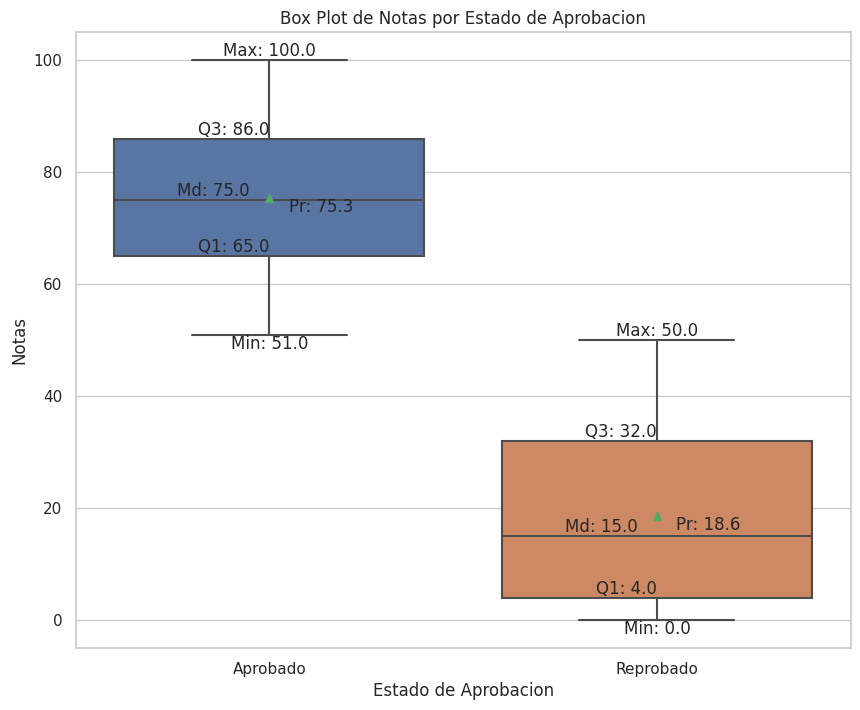

In [ ]:
# @title II.11.2 Boxplot Notas por Estado de Aprobacion
# Crear boxplot
sns.set(style="whitegrid")  # Set style
plt.figure(figsize=(10, 8))  # Set figure size
ax = sns.boxplot(x='Estado_Aprobacion', y='Nota_Final', data=data, showfliers=True, showmeans=True)

# Anotar detalles
for i, category in enumerate(data['Estado_Aprobacion'].unique()):
    subset = data[data['Estado_Aprobacion'] == category]
    q1 = subset['Nota_Final'].quantile(0.25)
    median = subset['Nota_Final'].median()
    q3 = subset['Nota_Final'].quantile(0.75)
    mean = subset['Nota_Final'].mean()
    max = subset['Nota_Final'].max()
    min = subset['Nota_Final'].min()

    ax.text(i, min, f'Min: {min:.1f}', ha='center', va='top')
    ax.text(i, q1, f'Q1: {q1:.1f}', ha='right', va='bottom')
    ax.text(i-0.05, median, f'Md: {median:.1f}', ha='right', va='bottom')
    ax.text(i, q3, f'Q3: {q3:.1f}', ha='right', va='bottom')
    ax.text(i+0.05, mean, f'Pr: {mean:.1f}', ha='left', va='top')
    ax.text(i, max, f'Max: {max:.1f}', ha='center', va='bottom')


plt.xlabel('Estado de Aprobacion')
plt.ylabel('Notas')
plt.title('Box Plot de Notas por Estado de Aprobacion')
plt.show()

Análizando las notas de los aprobados y reprobados, se puede ver que:
*  Los aprobados tienen una distribución simetrica que parece ser normal, con un promedio y media similares que rondan los 75 pts. y se puede ver también que el 75% de los estudiantes aprueban con notas de 65 pts en adelante.
*  Los estudiantes reprobados tienen una distribución asimetrica que concentra notas bajas, con una media de 18.6 y una mediana de 15 pts, la mayoría reprueba con notas menores a 32 pts (75%).

In [ ]:
# @title II.12 Generar DF de Promedio de Notas Finales por Estudiante
notasPromedioEst_df = data.groupby([
    "Estudiante"
  , "Id_Estudiante"
  , "Codigo_Carrera"
  , "Estado_matriculacion"
  , "Id_periodo"
  ])['Nota_Final'].mean().reset_index()
notasPromedioEst_df.columns = [
    'Estudiante'
  , 'Id_Estudiante'
  , 'Codigo_Carrera'
  , 'Est_matriculacion'
  , 'Id_Periodo'
  , 'Promedio'
  ]
notasPromedioEst_df

,Estudiante,Id_Estudiante,Codigo_Carrera,Est_matriculacion,Id_Periodo,Promedio
0,"ABAD BELTRAN, BENJAMIN JESUS",13695061,SIS,Matriculated,2023-S1-PR-EA,90.625000
1,"ABALOS PEREZ, MARIA ALICIA",8228065,ENF,Accepted for Enrollment,2023-S1-PR-SC,70.125000
2,"ABARCA PONCE, ROSSMERY LIBERTAD",72105246,MED,Accepted for Enrollment,2023-S1-PR-LP,63.428571
3,"ABASTO ARANIBAR, MARCELO ANDRES",9196249,MED,Matriculated,2023-S1-PR-LP,71.142857
4,"ABASTOFLOR AMPUERO, MELISSA ALEXANDRA",8321040,DGP,Matriculated,2023-S1-PR-LP,77.000000
...,...,...,...,...,...,...
14953,"ZUÑIGA BILBAO, KATIA",9072970,ADM,Matriculated,2023-S1-PR-LP,59.000000
14954,"ZUÑIGA CHACCA, YANDELYN BRIGGITTE",117034495,AHT,Matriculated,2023-S1-PR-LP,52.500000
14955,"ZUÑIGA QUILLA, CIELO AMANDA",6956856,ENF,Accepted for Enrollment,2023-S1-PR-EA,54.714286
14956,"ZUÑIGA QUISPE, YAHIR CARLOS",9907549,CPU,Accepted for Enrollment,2023-S1-PR-LP,54.857143


In [ ]:
#@title II.12.1 Tratamiento de notas promedio
notasPromEst_df1 = data.groupby([
    "Estudiante"
  , "Id_Estudiante"
  , "Codigo_Carrera"
  , "Estado_matriculacion"
  ])['Nota_Final'].mean().reset_index()
notasPromEst_df1.columns = [
    'Estudiante'
  , 'Id_Estudiante'
  , 'Codigo_Carrera'
  , 'Est_matriculacion'
  , 'Promedio'
  ]
notasPromEst_df1

,Estudiante,Id_Estudiante,Codigo_Carrera,Est_matriculacion,Promedio
0,"ABAD BELTRAN, BENJAMIN JESUS",13695061,SIS,Matriculated,90.625000
1,"ABALOS PEREZ, MARIA ALICIA",8228065,ENF,Accepted for Enrollment,70.125000
2,"ABARCA PONCE, ROSSMERY LIBERTAD",72105246,MED,Accepted for Enrollment,63.428571
3,"ABASTO ARANIBAR, MARCELO ANDRES",9196249,MED,Matriculated,71.142857
4,"ABASTOFLOR AMPUERO, MELISSA ALEXANDRA",8321040,DGP,Matriculated,77.000000
...,...,...,...,...,...
14887,"ZUÑIGA BILBAO, KATIA",9072970,ADM,Matriculated,59.000000
14888,"ZUÑIGA CHACCA, YANDELYN BRIGGITTE",117034495,AHT,Matriculated,52.500000
14889,"ZUÑIGA QUILLA, CIELO AMANDA",6956856,ENF,Accepted for Enrollment,54.714286
14890,"ZUÑIGA QUISPE, YAHIR CARLOS",9907549,CPU,Accepted for Enrollment,54.857143


In [ ]:
# @title II.13 Tabla de estudiantes repetidos
duplicated_estudiantes = notasPromedioEst_df[notasPromedioEst_df.duplicated('Id_Estudiante', keep=False)]
duplicated_estudiantes

,Estudiante,Id_Estudiante,Codigo_Carrera,Est_matriculacion,Id_Periodo,Promedio
481,"ALVARADO QUISPE, ESTEFANY REBECA",9917017,ENF,Accepted for Enrollment,2023-S1-PR-EA,85.857143
482,"ALVARADO QUISPE, ESTEFANY REBECA",9917017,ENF,Accepted for Enrollment,2023-S1-SI-PR-LP,NaN
494,"ALVAREZ CANAVIRI, BIANCA DIANA",13277538,ICO,Accepted for Enrollment,2023-S1-PR-LP,NaN
495,"ALVAREZ CANAVIRI, BIANCA DIANA",13277538,ICO,Accepted for Enrollment,2023-S1-SI-PR-EA,71.000000
583,"ANAVI CUYO, BIANCA CARLA",9895956,MED,Accepted for Enrollment,2023-S1-PR-LP,NaN
...,...,...,...,...,...,...
14286,"VENEGAS ARPASI, LUZY LUIZ",60759108,MED,Accepted for Enrollment,2023-S1-SI-PR-LP,65.750000
14815,"ZAPANA PINO, RASHIA LUZ",74121144,MED,Accepted for Enrollment,2023-S1-PR-LP,100.000000
14816,"ZAPANA PINO, RASHIA LUZ",74121144,MED,Accepted for Enrollment,2023-S1-SI-PR-LP,71.400000
14930,"ZURITA CALIZAYA, NAYELLI KATIHUSCA",70984455,MED,Accepted for Enrollment,2023-S1-PR-LP,NaN


In [ ]:
# @title II.14.1 Adición de Nivel de logro
# Obtencion de un df de Promedios por estudiante
PromedioEst_df = data.groupby(['Id_Estudiante'])['Nota_Final'].mean().reset_index()
PromedioEst_df

# Columnas añadidas para mejor detalle y análisis

data_unique_car = data[['Id_Estudiante', 'Codigo_Carrera', 'Sede']].drop_duplicates(subset=['Id_Estudiante'])
PromedioEst_df = pd.merge(
    PromedioEst_df.loc[:, ['Id_Estudiante', 'Nota_Final']]
  , data_unique_car.loc[:, ['Id_Estudiante', 'Codigo_Carrera', 'Sede']]
  , on='Id_Estudiante'
  , how="left"
  )

def nivel_logro(fila):
  if 95 <= fila['Nota_Final'] < 100:
    return 'Excelencia'
  if fila['Nota_Final'] >= 90:
    return 'Estrategico'
  if fila['Nota_Final'] >= 75:
    return 'Autonomo'
  if fila['Nota_Final'] >= 51:
    return 'Basico'
  if 0 <= fila['Nota_Final'] < 51:
    return 'Inicial'
  return np.nan

PromedioEst_df['Nvl_logro'] = PromedioEst_df.apply(lambda fila: nivel_logro(fila), axis=1)
PromedioEst_df

,Id_Estudiante,Nota_Final,Codigo_Carrera,Sede,Nvl_logro
0,001609774,92.200000,MED,SC,Estrategico
1,0033219,70.200000,MED,CB,Basico
2,0039883,NaN,MED,CB,NaN
3,0054645,NaN,MED,CB,NaN
4,0055308,58.666667,MED,CB,Basico
...,...,...,...,...,...
14883,9998431,85.714286,PYM,LP,Autonomo
14884,9998891,57.857143,ICO,LP,Basico
14885,9998904,50.142857,SIS,LP,Inicial
14886,9999448,84.166667,BYF,LP,Autonomo


In [ ]:
# @title II.14.2 Detalles de la tabla de promedios por estudiantes
PromedioEst_df.describe(include='all')

,Id_Estudiante,Nota_Final,Codigo_Carrera,Sede,Nvl_logro
count,14888,14023.000000,14888,14888,14023
unique,14888,NaN,17,4,5
top,001609774,NaN,MED,EA,Basico
freq,1,NaN,4395,4650,5836
mean,NaN,64.701412,NaN,NaN,NaN
std,NaN,23.141025,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN
25%,NaN,57.333333,NaN,NaN,NaN
50%,NaN,70.800000,NaN,NaN,NaN
75%,NaN,80.375000,NaN,NaN,NaN


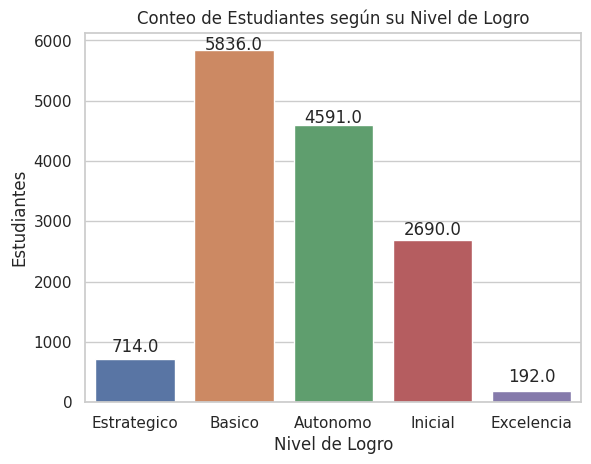

In [ ]:
# @title II.14.3 Barplot Estudiantes por su Nivel de Logro
ax = sns.countplot(x="Nvl_logro", data=PromedioEst_df)

# Incluir los datos en el grafico
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()*0.976),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Nivel de Logro')
plt.ylabel('Estudiantes')
plt.title('Conteo de Estudiantes según su Nivel de Logro')
plt.show()

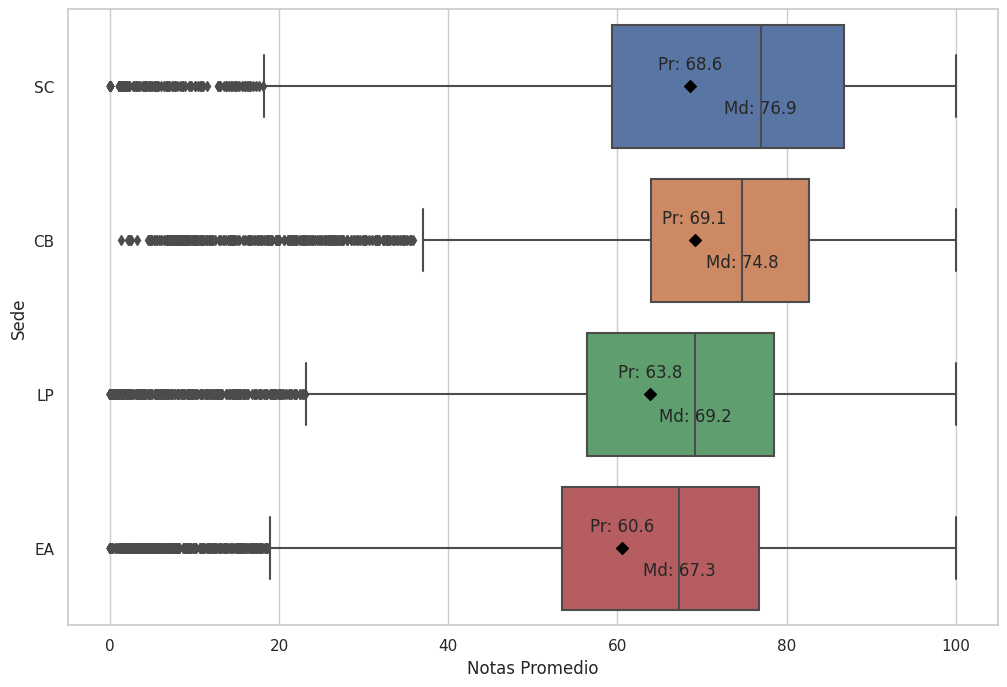

In [ ]:
# @title II.6.1 Distribucion de Promedios de Notas finales por Sede
plt.figure(figsize=(12, 8))
ax = sns.boxplot(
    data=PromedioEst_df
  , x="Nota_Final"
  , y="Sede"
  , dodge = True
  , showfliers = True
    )
for i, sede in enumerate(PromedioEst_df['Sede'].unique()):

  subset = PromedioEst_df[PromedioEst_df['Sede'] == sede].dropna()
  mean = subset['Nota_Final'].mean()
  median = subset['Nota_Final'].median()

  ax.text(median, i+0.2, f'Md: {median:.1f}', ha='center', va='bottom')
  ax.scatter(mean, i, color='black', marker='D', zorder=5)
  ax.text(mean, i-0.2, f'Pr: {mean:.1f}', ha='center', va='top')

plt.xlabel('Notas Promedio')
plt.ylabel('Sede')
plt.show()

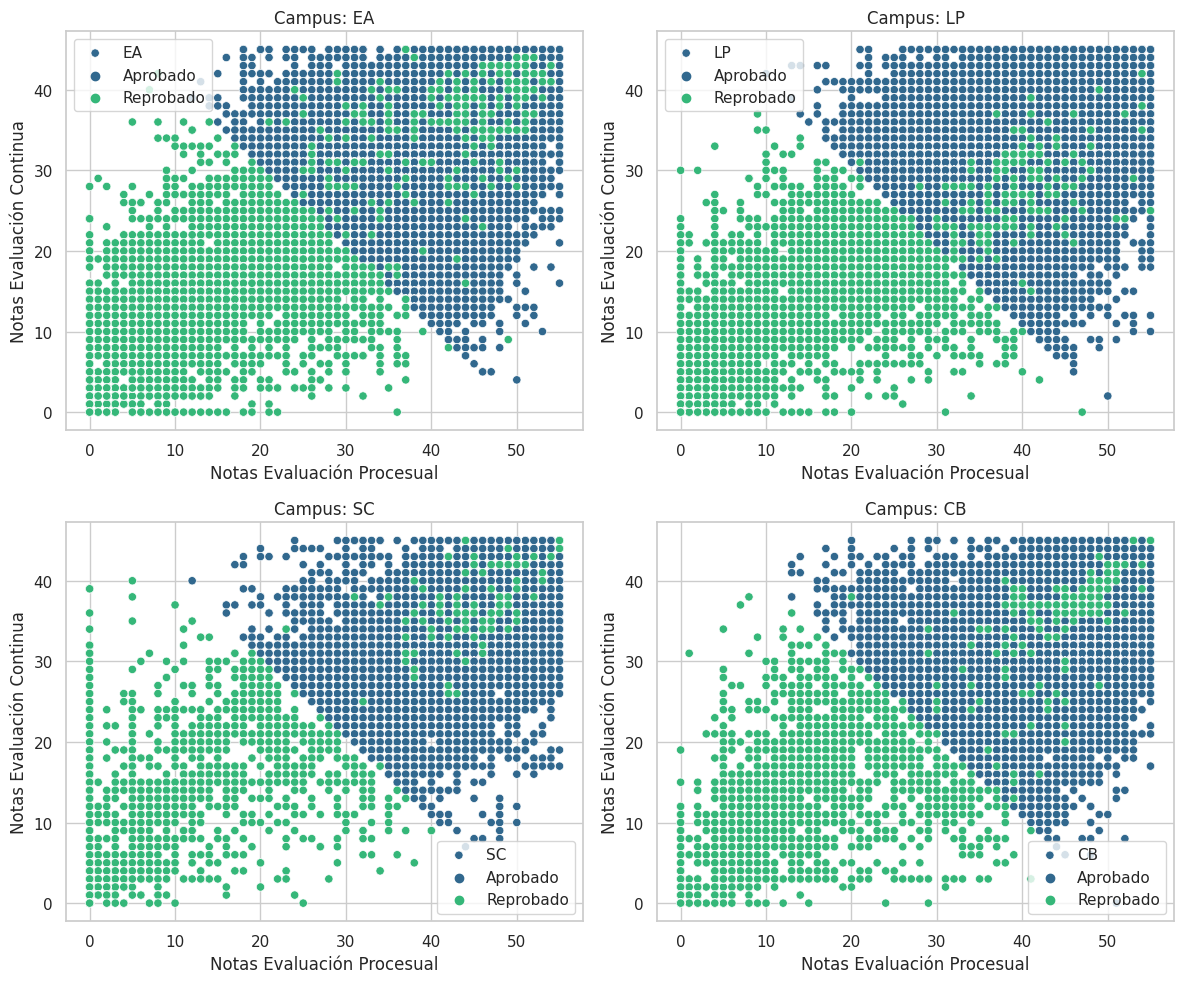

In [ ]:
# Crear un lienzo para cuatro subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# aplanado de ejes, para mejorar la iteración
axes = axes.flatten()

# Iterando para cada sede en el dataset
for i, sede in enumerate(data['Sede'].unique()):
    ax = axes[i]

    # captura los datos solo para la sede observada
    campus_data = data.query('Sede == @sede')

    # crea scatter plot para una sede dada
    sns.scatterplot(x='Ev_Procesual', y='Ev_Continuo', data=campus_data, hue='Estado_Aprobacion', ax=ax, label=f'{sede}', palette='viridis')

    ax.set_title(f'Campus: {sede}')
    ax.set_xlabel('Notas Evaluación Procesual')
    ax.set_ylabel('Notas Evaluación Continua')
    ax.legend()

# Ajuste del layout
plt.tight_layout()

# Mostrar plot
plt.show()

* En general se puede observar que en todas las sedes los **estudiantes aprueban** con **notas mayores a 25 para ambas evaluaciones**.
* En todas las sedes hay grupos de estudiantes que aprobaron materias obteniendo una nota muy alta en una de las evaluaciones y una nota baja en la otra, esto parece más pronunciado en las sedes de La Paz y El Alto.
* En las sedes de **Santa Cruz, La Paz y El Alto** hay grupos de estudiantes que **reprobaron** por **concentrarse** en las **evaluaciones Continuas** y tienen **cero en las Procesuales**.
* Se pueden observar materias que se catalogaron como **reprobadas** aún teniendo **notas de aprobación** para ambos tipos de evaluación.

In [ ]:
#@title Lista de materias sin Notas Finales, pero con notas de aprobación en Evaluaciones Continuas y Procesuales
materias_aprobadas_NF_null = data[(data['Ev_Continuo'] + data['Ev_Procesual'] > 50) & (data['Estado_Aprobacion']=='Reprobado') & (data['Nota_Final'].isnull())]
materias_aprobadas_NF_null. head()

,Estudiante,Id_Estudiante,Email,Codigo_Carrera,Carrera,Id_Materia,Materia,Estado_materia,Periodo_materia,Id_periodo,Estado_matriculacion,Transferido,Hito_2,Ev_Proc_Hito_2,Hito_3,Ev_Proc_Hito_3,Hito_4,Ev_Proc_Hito_4,Hito_5,Ev_Proc_Hito_5,Nota_Final,Hitos,Sede,Gestion,Ev_Continuo,Ev_Procesual,Estado_Aprobacion
90621,"ABUHADBA UGARTE, EMMA MILAGROS",70663729,scze.emmamilagros.abuhadba.ug@unifranz.edu.bo,MED,Licenciatura en Medicina SC,SC-DER-811-P-5-MED,DERMATOLOGÍA,Registered,Semestre 8,2023-S1-PR-SC,Matriculated,False,14.0,8.0,13.0,10.0,15.0,9.0,14.0,10.0,NaN,8,SC,2023-S1,42.0,51.0,Reprobado
90646,"ACOCHIRI JURADO, SHEIKA KYONNE",12699620,lpze.sheikakyonne.acochiri.ju@unifranz.edu.bo,MED,Licenciatura en Medicina LP,LP-AFI-B-111-C-177-MED,ANATOMÍA Y FISIOLOGÍA,Registered,Semestre 1,2023-S1-SI-PR-LP,Accepted for Enrollment,False,9.0,9.0,8.0,7.0,10.0,7.0,11.0,7.0,NaN,8,LP,2023-S1,27.0,41.0,Reprobado
90663,"ADUVIRI ALEGRE, ELIZABETH",9994760,cbbe.elizabeth.aduviri.al@unifranz.edu.bo,BYF,Licenciatura en Bioquímica y Farmacia CB,CB-CPE-1011-P-4-BYF,CURSO PREPARATORIO EXAMEN DE GRADO,Registered,Semestre 10,2023-S1-PR-CB,Matriculated,False,11.0,10.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,8,CB,2023-S1,21.0,30.0,Reprobado
90675,"ADUVIRI YUJRA, WARA BELEN",10932827,eate.warabelen.aduviri.yu@unifranz.edu.bo,BYF,Licenciatura en Bioquímica y Farmacia EA,EA-LBI-111-P-150-BYF,LABORATORIO DE BIOLOGÍA,Registered,Semestre 1,2023-S1-SI-PR-EA,Accepted for Enrollment,False,12.0,9.0,12.0,5.0,12.0,6.0,11.0,7.0,NaN,8,EA,2023-S1,36.0,38.0,Reprobado
90677,"ADUVIRI YUJRA, WARA BELEN",10932827,eate.warabelen.aduviri.yu@unifranz.edu.bo,BYF,Licenciatura en Bioquímica y Farmacia EA,EA-QOR-111-P-150-BYF,QUÍMICA ORGÁNICA I,Registered,Semestre 1,2023-S1-SI-PR-EA,Accepted for Enrollment,False,14.0,10.0,13.0,9.0,13.0,8.0,15.0,9.0,NaN,8,EA,2023-S1,40.0,51.0,Reprobado


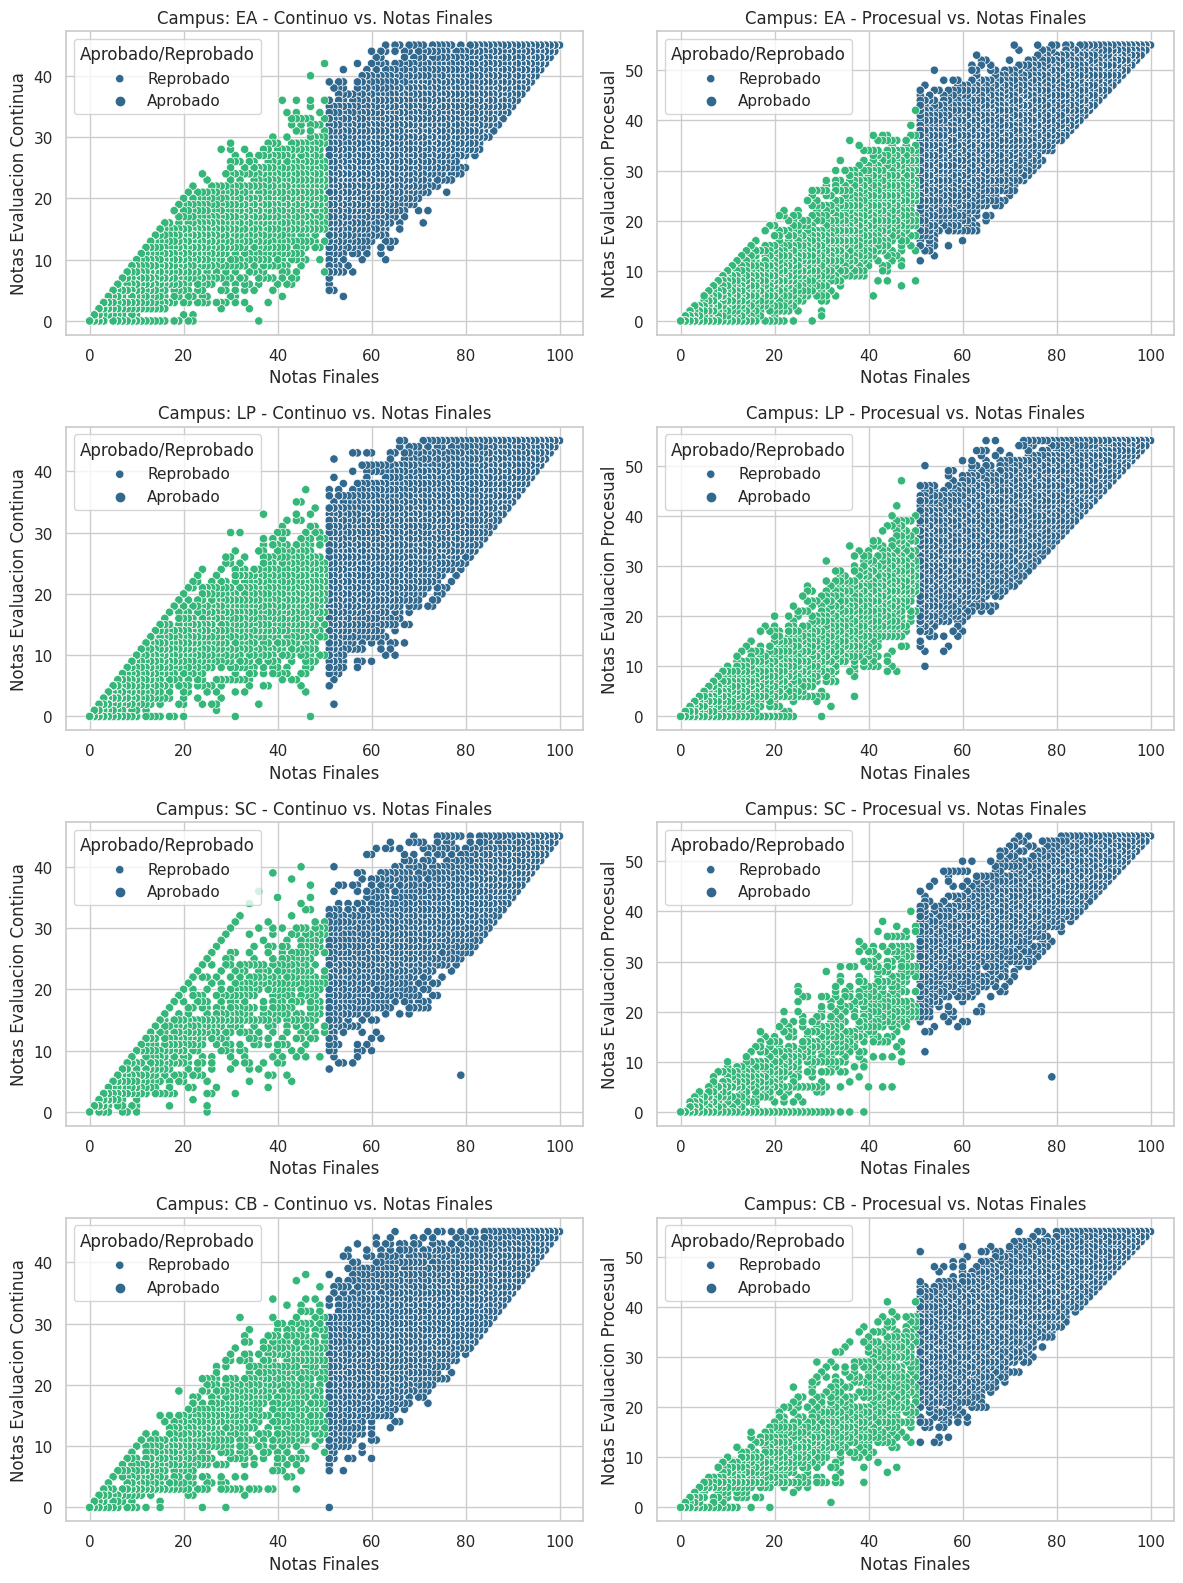

In [ ]:
#@title Scatterplots Continuo y Procesual vs Notas Finales
# Create a 4x2 grid of subplots for Continual vs. Final Marks and Procesual vs. Final Marks
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

# Create a custom color palette for the legend
legend_colors = {'Aprobado': 'green', 'Reprobado': 'red'}

# Iterate over unique campuses and plot the comparisons
for i, campus in enumerate(data['Sede'].unique()):
    campus_data = data[data['Sede'] == campus]

    # Plot Continual vs. Final Marks
    ax1 = axes[i * 2]
    sns.scatterplot(x='Nota_Final', y='Ev_Continuo', hue='Estado_Aprobacion', data=campus_data, palette='viridis', ax=ax1)
    ax1.set_title(f'Campus: {campus} - Continuo vs. Notas Finales')
    ax1.set_xlabel('Notas Finales')
    ax1.set_ylabel('Notas Evaluacion Continua')
    ax1.legend(title='Aprobado/Reprobado', labels=['Reprobado', 'Aprobado'], loc='upper left')
    # ax1.get_legend().set_custom_legend_colors(legend_colors)

    # Plot Procesual vs. Final Marks
    ax2 = axes[i * 2 + 1]
    sns.scatterplot(x='Nota_Final', y='Ev_Procesual', hue='Estado_Aprobacion', data=campus_data, palette='viridis', ax=ax2)
    ax2.set_title(f'Campus: {campus} - Procesual vs. Notas Finales')
    ax2.set_xlabel('Notas Finales')
    ax2.set_ylabel('Notas Evaluacion Procesual')
    ax2.legend(title='Aprobado/Reprobado', labels=['Reprobado', 'Aprobado'], loc='upper left')
    # ax2.get_legend().set_custom_legend_colors(legend_colors)

plt.tight_layout()
plt.show()

In [ ]:
data[data['Nota_Final'].isna()]

,Estudiante,Id_Estudiante,Email,Codigo_Carrera,Carrera,Id_Materia,Materia,Estado_materia,Periodo_materia,Id_periodo,Estado_matriculacion,Transferido,Hito_2,Ev_Proc_Hito_2,Hito_3,Ev_Proc_Hito_3,Hito_4,Ev_Proc_Hito_4,Hito_5,Ev_Proc_Hito_5,Nota_Final,Hitos,Sede,Gestion,Ev_Continuo,Ev_Procesual,Estado_Aprobacion
90613,"ABELO LOPEZ, HELEN ESTHER",10038605,eate.helenesther.abelo.lo@unifranz.edu.bo,MED,Licenciatura en Medicina EA,EA-ING-313-C-14-MED,INGLÉS III,Dropped,Semestre 3,2023-S1-PR-EA,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,EA,2023-S1,NaN,NaN,Reprobado
90614,"ABREGO DE GUZMAN, ROMINA ARIANA",13416161,scze.rominaariana.abrego.de@unifranz.edu.bo,PSI,Licenciatura en Psicología SC,SC-CAP-211-P-4-PSI,CONSTRUCCIÓN Y APLICACIÓN DE\nPRUEBAS PSICOMÉT...,Dropped,Semestre 2,2023-S1-PR-SC,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,SC,2023-S1,NaN,NaN,Reprobado
90615,"ABREGO DE GUZMAN, ROMINA ARIANA",13416161,scze.rominaariana.abrego.de@unifranz.edu.bo,PSI,Licenciatura en Psicología SC,SC-FPS-311-P-4-PSI,FUNDAMENTOS EN PSICOLOGÍA SOCIAL,Dropped,Semestre 3,2023-S1-PR-SC,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,SC,2023-S1,NaN,NaN,Reprobado
90616,"ABREGO DE GUZMAN, ROMINA ARIANA",13416161,scze.rominaariana.abrego.de@unifranz.edu.bo,PSI,Licenciatura en Psicología SC,SC-PED-511-P-4-PSI,PSICOLOGÍA EDUCATIVA I,Dropped,Semestre 5,2023-S1-PR-SC,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,SC,2023-S1,NaN,NaN,Reprobado
90617,"ABREGO MONTERO, VITTY VICTORIA",13963228,scze.vittyvictoria.abrego.mo@unifranz.edu.bo,MED,Licenciatura en Medicina SC,SC-EME-111-P-175-MED,ÉTICA MÉDICA,Registered,Semestre 1,2023-S1-SI-PR-SC,Accepted for Enrollment,False,10.0,7.0,13.0,9.0,NaN,NaN,NaN,NaN,NaN,4,SC,2023-S1,NaN,NaN,Reprobado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100425,"SILVA CANAVIRI, PAULA",9994624,eate.paula.silva.ca@unifranz.edu.bo,BYF,Licenciatura en Bioquímica y Farmacia EA,EA-PII-BYF-311-P-7-BYF,PROYECTO INTEGRADOR INTERMEDIO I,Dropped,Semestre 3,2023-S1-PR-EA,Abandono,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,EA,2023-S1,NaN,NaN,Reprobado
100426,"SILVA CANAVIRI, PAULA",9994624,eate.paula.silva.ca@unifranz.edu.bo,BYF,Licenciatura en Bioquímica y Farmacia EA,EA-MIC-411-P-2-BYF,MICROBIOLOGÍA I,Dropped,Semestre 4,2023-S1-PR-EA,Abandono,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,EA,2023-S1,NaN,NaN,Reprobado
100427,"SILVA CANAVIRI, PAULA",9994624,eate.paula.silva.ca@unifranz.edu.bo,BYF,Licenciatura en Bioquímica y Farmacia EA,EA-TFA-411-P-2-BYF,TECNOLOGÍA FARMACÉUTICA I,Dropped,Semestre 4,2023-S1-PR-EA,Abandono,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,EA,2023-S1,NaN,NaN,Reprobado
100428,"ZURITA VARGAS, LAIZA",13001483,cbbe.laiza.zurita.va@unifranz.edu.bo,MED,Licenciatura en Medicina CB,CB-UEM-811-E-1-MED,URGENCIAS Y EMERGENCIAS\nMÉDICAS I,Dropped,Semestre 8,2023-S1-PR-CB,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,CB,2023-S1,NaN,NaN,Reprobado


In [ ]:
data[data['Nota_Final'].isna()].describe(include='all')

,Estudiante,Id_Estudiante,Email,Codigo_Carrera,Carrera,Id_Materia,Materia,Estado_materia,Periodo_materia,Id_periodo,Estado_matriculacion,Transferido,Hito_2,Ev_Proc_Hito_2,Hito_3,Ev_Proc_Hito_3,Hito_4,Ev_Proc_Hito_4,Hito_5,Ev_Proc_Hito_5,Nota_Final,Hitos,Sede,Gestion,Ev_Continuo,Ev_Procesual,Estado_Aprobacion
count,9817,9817,9817,9817,9817,9817,9817,9817,9817,9817,9817,9817,2109.000000,2107.000000,1839.000000,1839.000000,1621.000000,1622.000000,846.000000,873.000000,0.0,9817.000000,9817,9817,1621.000000,845.000000,9817
unique,3802,3802,3802,17,101,2068,536,3,11,8,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,1
top,"SERRANO ARAUCO, DANIELA FERNANDA",72371561,cbbe.danielafernanda.serrano.ar@unifranz.edu.bo,MED,Licenciatura en Medicina CB,SC-IRS-1111-P-7-MED,INGLÉS I,Dropped,Semestre 1,2023-S1-PR-CB,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CB,2023-S1,NaN,NaN,Reprobado
freq,14,14,14,4735,2242,71,522,5711,3146,2716,5725,8593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3001,9817,NaN,NaN,9817
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.886202,5.655909,8.874932,6.027189,9.152375,6.467941,9.300236,6.446735,NaN,1.316084,NaN,NaN,28.200494,36.532544,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.523569,3.741501,5.393304,3.516063,4.939096,3.294494,5.062186,3.386050,NaN,2.679425,NaN,NaN,13.328838,15.226659,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,4.000000,4.000000,7.000000,5.000000,7.000000,5.000000,NaN,0.000000,NaN,NaN,22.000000,32.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,7.000000,11.000000,7.000000,11.000000,8.000000,11.000000,8.000000,NaN,0.000000,NaN,NaN,33.000000,41.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,9.000000,13.000000,9.000000,13.000000,9.000000,13.000000,9.000000,NaN,0.000000,NaN,NaN,38.000000,47.000000,NaN


In [ ]:
data[data['Nota_Final'].isna() == False].describe(include='all')

,Estudiante,Id_Estudiante,Email,Codigo_Carrera,Carrera,Id_Materia,Materia,Estado_materia,Periodo_materia,Id_periodo,Estado_matriculacion,Transferido,Hito_2,Ev_Proc_Hito_2,Hito_3,Ev_Proc_Hito_3,Hito_4,Ev_Proc_Hito_4,Hito_5,Ev_Proc_Hito_5,Nota_Final,Hitos,Sede,Gestion,Ev_Continuo,Ev_Procesual,Estado_Aprobacion
count,90613,90613,90613,90613,90613,90613,90613,90613,90613,90613,90607,90613,90605.000000,90605.000000,90602.000000,90602.000000,90602.000000,90602.000000,90602.000000,90602.000000,90613.000000,90613.000000,90613,90613,90602.000000,90602.000000,90613
unique,14022,14023,14023,17,117,4488,680,3,11,8,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,NaN,NaN,2
top,"PEREDO PERALTA, CAMILA ARIANA",9984334,cbbe.camilaariana.peredo.pe@unifranz.edu.bo,MED,Licenciatura en Medicina CB,LP-ING-111-C-25-DGP,INGLÉS I,Registered,Semestre 1,2023-S1-PR-LP,Matriculated,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LP,2023-S1,NaN,NaN,Aprobado
freq,14,14,14,24059,9391,59,3962,90517,27909,27532,41255,87074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28600,90613,NaN,NaN,74574
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.742332,6.768081,9.544447,6.677546,9.532670,6.703638,9.622392,6.688417,65.280412,8.039067,NaN,NaN,28.819739,36.460266,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.289899,2.971789,4.522013,3.105743,4.699826,3.220819,5.028510,3.407738,25.739958,0.463801,NaN,NaN,11.885166,14.997519,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,56.000000,8.000000,NaN,NaN,23.000000,31.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,8.000000,11.000000,8.000000,11.000000,8.000000,11.000000,8.000000,71.000000,8.000000,NaN,NaN,31.000000,40.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.000000,9.000000,13.000000,9.000000,13.000000,9.000000,14.000000,9.000000,84.000000,8.000000,NaN,NaN,38.000000,47.000000,NaN
